<h1><center> <span style="color:green"> WATI.io -  Assessment </span> </center></h1>

# <span style='background :yellow' > Context: </span>
**Business Operations Associate - Take Home Assignment**

Analyze the rate of payment failures and figure out any patterns or actionable insights on how we can improve and reduce. Visualize them in charts if possible.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

In [2]:
#importing data from Data 1 sheet
data1 = pd.read_excel('C:/Users/Rajeshri Jogi/Desktop/WATI/Bizops Associate - assignment data.xlsx',sheet_name= 'Data 1',  engine='openpyxl')

# <span style='background :yellow' >Data 1: </span>

In [3]:
data1.head(10)

,Invoice Number,Invoice Date,Amount,Status,Recurring,First Invoice,Amount Due,Payments,Currency,Customer Billing Country
0,89665,2022-09-26 18:11:00,2900.0,Payment Due,True,False,2900.0,0.0,INR,NaN
1,89664,2022-09-26 18:11:00,49.0,Paid,True,False,0.0,49.0,USD,NaN
2,89663,2022-09-26 18:10:00,20.0,Paid,False,False,0.0,20.0,USD,NaN
3,89662,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD,NaN
4,89661,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD,NaN
5,89660,2022-09-26 18:05:00,30.0,Paid,False,False,0.0,30.0,USD,NaN
6,89659,2022-09-26 18:05:00,30.0,Voided,False,False,30.0,0.0,USD,NaN
7,89658,2022-09-26 18:04:00,27.0,Voided,False,False,27.0,0.0,USD,NaN
8,89657,2022-09-26 18:04:00,30.0,Paid,False,False,0.0,30.0,USD,NaN
9,89656,2022-09-26 18:04:00,27.0,Voided,False,False,27.0,0.0,USD,NaN


In [4]:
data1.shape

(43762, 10)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43762 entries, 0 to 43761
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Invoice Number            43762 non-null  int64         
 1   Invoice Date              43762 non-null  datetime64[ns]
 2   Amount                    43762 non-null  float64       
 3   Status                    43762 non-null  object        
 4   Recurring                 43762 non-null  bool          
 5   First Invoice             43762 non-null  bool          
 6   Amount Due                43762 non-null  float64       
 7   Payments                  43762 non-null  float64       
 8   Currency                  43762 non-null  object        
 9   Customer Billing Country  1562 non-null   object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 2.8+ MB


In [6]:
data1.isnull().sum()

Invoice Number                  0
Invoice Date                    0
Amount                          0
Status                          0
Recurring                       0
First Invoice                   0
Amount Due                      0
Payments                        0
Currency                        0
Customer Billing Country    42200
dtype: int64

In [7]:
data1.loc[data1.duplicated()]

,Invoice Number,Invoice Date,Amount,Status,Recurring,First Invoice,Amount Due,Payments,Currency,Customer Billing Country


In [8]:
data1.describe()

,Invoice Number,Amount,Amount Due,Payments
count,43762.000000,43762.000000,43762.000000,43762.000000
mean,67730.420845,661.674995,184.549880,472.214122
std,12679.120067,3161.870443,2401.669088,2073.620312
min,45701.000000,0.000000,0.000000,0.000000
25%,56759.250000,24.500000,0.000000,10.000000
50%,67745.500000,49.000000,0.000000,49.000000
75%,78709.750000,100.000000,0.000000,98.000000
max,89665.000000,219884.000000,219884.000000,160056.000000


In [9]:
data1.describe(include = ['bool', 'object'])

,Status,Recurring,First Invoice,Currency,Customer Billing Country
count,43762,43762,43762,43762,1562
unique,4,2,2,4,25
top,Paid,True,False,USD,IN
freq,35398,23268,37199,36359,1008


In [10]:
data1.columns

Index(['Invoice Number', 'Invoice Date', 'Amount', 'Status', 'Recurring',
       'First Invoice', 'Amount Due', 'Payments', 'Currency',
       'Customer Billing Country'],
      dtype='object')

In [11]:
data1.Status.value_counts()

Paid           35398
Voided          4507
Not Paid        2525
Payment Due     1332
Name: Status, dtype: int64

In [12]:
data1['Customer Billing Country'].value_counts()

IN    1008
ES      88
HK      55
AR      51
MY      50
ID      37
CO      33
MX      33
RO      27
IT      24
ZA      23
US      20
EC      19
SG      15
PE      14
SA      12
DE      10
GB       9
IL       8
KW       8
JO       5
CA       4
CZ       4
BO       4
PY       1
Name: Customer Billing Country, dtype: int64

In [13]:
data1.Currency.value_counts()

USD    36359
INR     6631
HKD      702
BRL       70
Name: Currency, dtype: int64

In [14]:
#checking calculation
data1[data1['Amount'] != data1['Amount Due'] + data1['Payments']]

,Invoice Number,Invoice Date,Amount,Status,Recurring,First Invoice,Amount Due,Payments,Currency,Customer Billing Country
50,89615,2022-09-26 17:14:00,13.40,Paid,True,False,0.0,9.11,USD,NaN
131,89533,2022-09-26 15:40:00,49.00,Paid,True,False,0.0,23.89,USD,NaN
411,89253,2022-09-26 08:04:00,53.62,Paid,True,False,0.0,26.81,USD,NaN
435,89229,2022-09-26 03:08:00,5.06,Paid,True,False,0.0,0.00,USD,NaN
803,88861,2022-09-25 16:14:00,1000.00,Paid,False,False,0.0,948.78,USD,NaN
...,...,...,...,...,...,...,...,...,...,...
42030,47471,2022-06-08 02:50:00,97.49,Paid,True,False,0.0,48.74,USD,NaN
42527,46965,2022-06-06 12:14:00,80.55,Paid,True,False,0.0,40.28,USD,NaN
42601,46888,2022-06-05 23:16:00,49.00,Paid,True,False,0.0,48.75,USD,NaN
42758,46730,2022-06-05 06:06:00,2900.00,Paid,True,False,0.0,0.00,INR,NaN


## <span style='background :yellow' > Data1 : Data Processing </span>

In [15]:
#deep copy of original 
df1 = data1.copy(deep = True)

In [16]:
#drop column Customer Billing Country as 90% of the data is null
df1.drop('Customer Billing Country', axis = 1, inplace = True)

In [17]:
#change the dtype
df1['Invoice Number'] = df1['Invoice Number'].astype('object')

In [18]:
df1.describe(include=object)

,Invoice Number,Status,Currency
count,43762,43762,43762
unique,43762,4,4
top,89665,Paid,USD
freq,1,35398,36359


In [19]:
#checking the amount due with comparison to Amount
df1[df1['Amount'] == df1['Amount Due']]

,Invoice Number,Invoice Date,Amount,Status,Recurring,First Invoice,Amount Due,Payments,Currency
0,89665,2022-09-26 18:11:00,2900.0,Payment Due,True,False,2900.0,0.0,INR
3,89662,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD
4,89661,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD
6,89659,2022-09-26 18:05:00,30.0,Voided,False,False,30.0,0.0,USD
7,89658,2022-09-26 18:04:00,27.0,Voided,False,False,27.0,0.0,USD
...,...,...,...,...,...,...,...,...,...
43748,45714,2022-06-01 00:02:00,49.0,Not Paid,True,False,49.0,0.0,USD
43750,45716,2022-06-01 00:02:00,49.0,Not Paid,True,False,49.0,0.0,USD
43752,45704,2022-06-01 00:02:00,49.0,Not Paid,True,False,49.0,0.0,USD
43757,45709,2022-06-01 00:02:00,1.0,Payment Due,True,False,1.0,0.0,USD


In [20]:
#Converting all the currencies to USD
df1.loc[df1.Currency == 'INR', 'Conv_rate'] = 0.012
df1.loc[df1.Currency == 'HKD', 'Conv_rate'] = 0.13
df1.loc[df1.Currency == 'BRL', 'Conv_rate'] = 0.20
df1.loc[df1.Currency == 'USD', 'Conv_rate'] = 1

In [21]:
#converting currencies to USD
df1['Amount'] = (df1['Amount'] * df1['Conv_rate']).round()
df1['Amount Due'] = (df1['Amount Due'] * df1['Conv_rate']).round()
df1['Payments'] = (df1['Payments'] * df1['Conv_rate']).round()
df1.drop('Conv_rate', axis = True, inplace = True)
df1.head()

,Invoice Number,Invoice Date,Amount,Status,Recurring,First Invoice,Amount Due,Payments,Currency
0,89665,2022-09-26 18:11:00,35.0,Payment Due,True,False,35.0,0.0,INR
1,89664,2022-09-26 18:11:00,49.0,Paid,True,False,0.0,49.0,USD
2,89663,2022-09-26 18:10:00,20.0,Paid,False,False,0.0,20.0,USD
3,89662,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD
4,89661,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD


In [22]:
#calculation true or false
(df1['Amount'] == df1['Amount Due'] + df1['Payments']).value_counts()

True     43466
False      296
dtype: int64

In [23]:
df1[df1['Amount'] != df1['Amount Due'] + df1['Payments']]

,Invoice Number,Invoice Date,Amount,Status,Recurring,First Invoice,Amount Due,Payments,Currency
50,89615,2022-09-26 17:14:00,13.0,Paid,True,False,0.0,9.0,USD
131,89533,2022-09-26 15:40:00,49.0,Paid,True,False,0.0,24.0,USD
411,89253,2022-09-26 08:04:00,54.0,Paid,True,False,0.0,27.0,USD
435,89229,2022-09-26 03:08:00,5.0,Paid,True,False,0.0,0.0,USD
803,88861,2022-09-25 16:14:00,1000.0,Paid,False,False,0.0,949.0,USD
...,...,...,...,...,...,...,...,...,...
42015,47488,2022-06-08 05:11:00,98.0,Paid,True,False,0.0,49.0,USD
42030,47471,2022-06-08 02:50:00,97.0,Paid,True,False,0.0,49.0,USD
42527,46965,2022-06-06 12:14:00,81.0,Paid,True,False,0.0,40.0,USD
42758,46730,2022-06-05 06:06:00,35.0,Paid,True,False,0.0,0.0,INR


### New Feature : Difference in Pay

In [24]:
df1['diff_pay'] = df1['Amount'] - (df1['Amount Due'] + df1['Payments'])
df1.head()

,Invoice Number,Invoice Date,Amount,Status,Recurring,First Invoice,Amount Due,Payments,Currency,diff_pay
0,89665,2022-09-26 18:11:00,35.0,Payment Due,True,False,35.0,0.0,INR,0.0
1,89664,2022-09-26 18:11:00,49.0,Paid,True,False,0.0,49.0,USD,0.0
2,89663,2022-09-26 18:10:00,20.0,Paid,False,False,0.0,20.0,USD,0.0
3,89662,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD,0.0
4,89661,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD,0.0


In [25]:
df1[(df1['diff_pay'] > 0) & (df1['diff_pay']< 1)]

,Invoice Number,Invoice Date,Amount,Status,Recurring,First Invoice,Amount Due,Payments,Currency,diff_pay


In [26]:
df1.diff_pay.describe()

count    43762.000000
mean         0.375326
std          9.443921
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1078.000000
Name: diff_pay, dtype: float64

In [27]:
df1.head()

,Invoice Number,Invoice Date,Amount,Status,Recurring,First Invoice,Amount Due,Payments,Currency,diff_pay
0,89665,2022-09-26 18:11:00,35.0,Payment Due,True,False,35.0,0.0,INR,0.0
1,89664,2022-09-26 18:11:00,49.0,Paid,True,False,0.0,49.0,USD,0.0
2,89663,2022-09-26 18:10:00,20.0,Paid,False,False,0.0,20.0,USD,0.0
3,89662,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD,0.0
4,89661,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD,0.0


# <span style='background :yellow' > Data 2: </span>

In [28]:
#importing data from Data 1 sheet
data2 = pd.read_excel('C:/Users/Rajeshri Jogi/Desktop/WATI/Bizops Associate - assignment data.xlsx',sheet_name= 'Data 2',  engine='openpyxl')

In [29]:
#checking
data2.head()

,Transaction Id,Invoice Number,Date,Type,Payment Method,Amount,Status,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency
0,txn_16Aqf7TIXA1bpIDkT,88908,2022-09-26 18:13:00,Payment,Card,49.0,Success,NaN,NaN,Stripe,MasterCard,ch_3LmEJvJCAUNUpKy80sEHvYb9,USD
1,txn_Azz3tiTIX9VrT8CJQ,89665,2022-09-26 18:11:00,Payment,Card,2900.0,In Progress,NaN,NaN,Stripe,Visa,pi_3LmEHxJCAUNUpKy80kTMWR5k,INR
2,txn_Azq7wrTIX9MOi771R,89664,2022-09-26 18:11:00,Payment,Paypal Express Checkout,49.0,Success,NaN,NaN,Paypal Express Checkout,Not Applicable,2GW95189S34546020,USD
3,txn_AzZZrnTIX9LQ5IUhL,88907,2022-09-26 18:11:00,Payment,Card,2900.0,Failure,card_declined,Your card is not supported for this currency. ...,Stripe,American Express,ch_3LmEHJJCAUNUpKy81APgPZGi,INR
4,txn_Azqbw3TIX9CdN8WA3,89663,2022-09-26 18:10:00,Payment,Paypal Express Checkout,20.0,Success,NaN,NaN,Paypal Express Checkout,Not Applicable,1EF82989EE774131D,USD


In [30]:
#checking
data2.shape

(69351, 13)

In [31]:
#checking
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction Id  69351 non-null  object        
 1   Invoice Number  69351 non-null  object        
 2   Date            69351 non-null  datetime64[ns]
 3   Type            69351 non-null  object        
 4   Payment Method  69351 non-null  object        
 5   Amount          69351 non-null  float64       
 6   Status          69351 non-null  object        
 7   Error Code      35083 non-null  object        
 8   Error Text      35167 non-null  object        
 9   Gateway         69351 non-null  object        
 10  Card Type       69351 non-null  object        
 11  Id At Gateway   66789 non-null  object        
 12  Currency        69351 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 6.9+ MB


In [32]:
#checking
data2.describe()

,Amount
count,69351.000000
mean,979.061249
std,2702.128930
min,0.200000
25%,39.200000
50%,49.000000
75%,399.000000
max,219884.000000


In [33]:
#checking
data2.describe(include = object)

,Transaction Id,Invoice Number,Type,Payment Method,Status,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency
count,69351,69351,69351,69351,69351,35083,35167,69351,69351,66789,69351
unique,69351,41926,2,7,3,13,25,3,5,66789,4
top,txn_16Aqf7TIXA1bpIDkT,79471,Payment,Card,Failure,card_declined,Your card was declined.,Stripe,Visa,ch_3LmEJvJCAUNUpKy80sEHvYb9,USD
freq,1,20,68931,65875,35167,30571,14203,65899,40545,1,53328


In [34]:
#checking
data2.columns

Index(['Transaction Id', 'Invoice Number', 'Date', 'Type', 'Payment Method',
       'Amount', 'Status', 'Error Code', 'Error Text', 'Gateway', 'Card Type',
       'Id At Gateway', 'Currency'],
      dtype='object')

In [35]:
#checking null values
data2.isnull().sum()

Transaction Id        0
Invoice Number        0
Date                  0
Type                  0
Payment Method        0
Amount                0
Status                0
Error Code        34268
Error Text        34184
Gateway               0
Card Type             0
Id At Gateway      2562
Currency              0
dtype: int64

## <span style='background :yellow' > Data2: Data Processing <span/>

In [36]:
#copy of the original data
df2 = data2.copy(deep=True)

In [37]:
#converting currencies to USD
df2.loc[df2.Currency == 'INR', 'Conv_rate'] = 0.012
df2.loc[df2.Currency == 'HKD', 'Conv_rate'] = 0.13
df2.loc[df2.Currency == 'BRL', 'Conv_rate'] = 0.20
df2.loc[df2.Currency == 'USD', 'Conv_rate'] = 1

In [38]:
#converting currencies to USD
df2['Amount'] = (df2['Amount'] * df2['Conv_rate']).round()
df2.drop('Conv_rate', axis = True, inplace = True)
df2.head()

,Transaction Id,Invoice Number,Date,Type,Payment Method,Amount,Status,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency
0,txn_16Aqf7TIXA1bpIDkT,88908,2022-09-26 18:13:00,Payment,Card,49.0,Success,NaN,NaN,Stripe,MasterCard,ch_3LmEJvJCAUNUpKy80sEHvYb9,USD
1,txn_Azz3tiTIX9VrT8CJQ,89665,2022-09-26 18:11:00,Payment,Card,35.0,In Progress,NaN,NaN,Stripe,Visa,pi_3LmEHxJCAUNUpKy80kTMWR5k,INR
2,txn_Azq7wrTIX9MOi771R,89664,2022-09-26 18:11:00,Payment,Paypal Express Checkout,49.0,Success,NaN,NaN,Paypal Express Checkout,Not Applicable,2GW95189S34546020,USD
3,txn_AzZZrnTIX9LQ5IUhL,88907,2022-09-26 18:11:00,Payment,Card,35.0,Failure,card_declined,Your card is not supported for this currency. ...,Stripe,American Express,ch_3LmEHJJCAUNUpKy81APgPZGi,INR
4,txn_Azqbw3TIX9CdN8WA3,89663,2022-09-26 18:10:00,Payment,Paypal Express Checkout,20.0,Success,NaN,NaN,Paypal Express Checkout,Not Applicable,1EF82989EE774131D,USD


In [39]:
#let's check the null values in Error code and count of status where it is null
df2[df2['Error Code'].isnull()]['Status'].value_counts()

Success        33896
In Progress      288
Failure           84
Name: Status, dtype: int64

```
It's understood that status with success and in progress can have no error code, so let's check on failure status where error code is null
```


In [40]:
#it's understood that status with success and in progress can have no error code, so let's check on failure status where error code is null
df2[(df2['Status'] == 'Failure') & (df2['Error Code'].isnull())]['Currency'].value_counts()

INR    82
USD     2
Name: Currency, dtype: int64

### Digging into NULL Error Code


In [41]:
df2[(df2['Status'] == 'Failure') & (df2['Error Code'].isnull())]

,Transaction Id,Invoice Number,Date,Type,Payment Method,Amount,Status,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency
6019,txn_Azz2ceTHyiGjZ1ZM6,85492,2022-09-20 20:50:00,Payment,Card,35.0,Failure,NaN,An error occurred while processing your paymen...,Stripe,Visa,NaN,INR
6031,txn_AzZeDWTHygj6t1slQ,85488,2022-09-20 20:44:00,Payment,Card,35.0,Failure,NaN,An error occurred while processing your paymen...,Stripe,Visa,NaN,INR
7836,txn_Azz3vvTHrfzEGNZm,76794,2022-09-19 15:57:00,Payment,Card,35.0,Failure,NaN,An error occurred while processing your paymen...,Stripe,Visa,NaN,INR
12504,txn_6opPRTHR1BvR3qli,77786,2022-09-15 02:32:00,Payment,Card,70.0,Failure,NaN,An error occurred while processing your paymen...,Stripe,Visa,NaN,INR
15505,txn_16AqbRTHCY10UHFt,80134,2022-09-12 15:08:00,Payment,Card,35.0,Failure,NaN,An error occurred while processing your paymen...,Stripe,Visa,NaN,INR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54725,txn_Azq7srTAfxE2m8Drl,55353,2022-07-05 10:28:00,Payment,Card,28.0,Failure,NaN,An error occurred while processing your paymen...,Stripe,MasterCard,NaN,INR
54958,txn_Azq7srTAc8dcC1EIr,55230,2022-07-04 18:48:00,Payment,Card,35.0,Failure,NaN,An error occurred while processing your paymen...,Stripe,Visa,NaN,INR
54961,txn_Azz3ihTAc7Ufhoma,55229,2022-07-04 18:44:00,Payment,Card,35.0,Failure,NaN,An error occurred while processing your paymen...,Stripe,Visa,NaN,INR
67378,txn_AzZeBXT84th1J131p,47405,2022-06-07 21:24:00,Payment,Card,35.0,Failure,NaN,An error occurred while processing your paymen...,Stripe,Visa,NaN,INR


In [42]:
df2[(df2['Status'] == 'Failure') & (df2['Error Code'].isnull())]['Card Type'].value_counts()

Visa          55
MasterCard    29
Name: Card Type, dtype: int64

In [43]:
df2[(df2['Status'] == 'Failure') & (df2['Error Code'].isnull())].describe(include = object)

,Transaction Id,Invoice Number,Type,Payment Method,Status,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency
count,84,84,84,84,84,0,84,84,84,0,84
unique,84,83,1,1,1,0,2,1,2,0,2
top,txn_Azz2ceTHyiGjZ1ZM6,61590,Payment,Card,Failure,NaN,An error occurred while processing your paymen...,Stripe,Visa,NaN,INR
freq,1,2,84,84,84,NaN,82,84,55,NaN,82


### Digging into NULL Error Text

In [44]:
df2[(df2['Status'] == 'Failure') & (df2['Error Code'].isnull())]['Error Text'].value_counts()

An error occurred while processing your payment. Try again in a little bit.                                                                                                                                                                                                                                82
The provided PaymentMethod was previously used with a PaymentIntent without Customer attachment, shared with a connected account without Customer attachment, or was detached from a Customer. It may not be used again. To use a PaymentMethod multiple times, you must attach it to a Customer first.     2
Name: Error Text, dtype: int64

In [45]:
#checking null values of Error Text column
df2[df2['Error Text'].isnull()]['Status'].value_counts()

Success        33896
In Progress      288
Name: Status, dtype: int64

```
It makes sense that Error text will be null for Status Success and In Progress
```

In [46]:
df2['Error Text'].nunique()

25

In [47]:
df2['Error Text'].value_counts().to_frame()

,Error Text
Your card was declined.,14203
Your card does not support this type of purchase.,8107
Your card has insufficient funds.,5177
"For recurring payment greater than mandate amount or INR 15000, payment was not approved by the card holder.",1828
Your card number is incorrect.,1259
Only active mandates can be used with PaymentIntents.,1122
Your card has expired.,803
Instruct the customer to retry the transaction using an alternative payment method from the customers PayPal wallet. The transaction did not complete with the customers selected payment method.,709
"For recurring payment greater than mandate amount or INR 5000, payment was not approved by the card holder.",466
You have exceeded the maximum number of declines on this card in the last 24 hour period. Please contact us via https://support.stripe.com/contact if you need further assistance.,436


### Digging into Invoice Number

In [48]:
df2['Invoice Number'].value_counts()

79471         20
56999         20
50081         20
65776         19
73201         18
              ..
73227          1
5969970033     1
73230          1
73231          1
71080          1
Name: Invoice Number, Length: 41926, dtype: int64

In [49]:
df2['no_of_trials'] = df2['Invoice Number'].map(df2['Invoice Number'].value_counts())
df2.head()

,Transaction Id,Invoice Number,Date,Type,Payment Method,Amount,Status,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency,no_of_trials
0,txn_16Aqf7TIXA1bpIDkT,88908,2022-09-26 18:13:00,Payment,Card,49.0,Success,NaN,NaN,Stripe,MasterCard,ch_3LmEJvJCAUNUpKy80sEHvYb9,USD,2
1,txn_Azz3tiTIX9VrT8CJQ,89665,2022-09-26 18:11:00,Payment,Card,35.0,In Progress,NaN,NaN,Stripe,Visa,pi_3LmEHxJCAUNUpKy80kTMWR5k,INR,1
2,txn_Azq7wrTIX9MOi771R,89664,2022-09-26 18:11:00,Payment,Paypal Express Checkout,49.0,Success,NaN,NaN,Paypal Express Checkout,Not Applicable,2GW95189S34546020,USD,1
3,txn_AzZZrnTIX9LQ5IUhL,88907,2022-09-26 18:11:00,Payment,Card,35.0,Failure,card_declined,Your card is not supported for this currency. ...,Stripe,American Express,ch_3LmEHJJCAUNUpKy81APgPZGi,INR,2
4,txn_Azqbw3TIX9CdN8WA3,89663,2022-09-26 18:10:00,Payment,Paypal Express Checkout,20.0,Success,NaN,NaN,Paypal Express Checkout,Not Applicable,1EF82989EE774131D,USD,1


In [50]:
df2.columns

Index(['Transaction Id', 'Invoice Number', 'Date', 'Type', 'Payment Method',
       'Amount', 'Status', 'Error Code', 'Error Text', 'Gateway', 'Card Type',
       'Id At Gateway', 'Currency', 'no_of_trials'],
      dtype='object')

In [51]:
df2[df2['Invoice Number']== 79471].head(5)

,Transaction Id,Invoice Number,Date,Type,Payment Method,Amount,Status,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency,no_of_trials
5707,txn_16BeZQTHzWw2I45QR,79471,2022-09-21 00:11:00,Payment,Card,6960.0,Failure,card_declined,Your card was declined.,Stripe,Visa,ch_3Lk92qJCAUNUpKy80k00MmO1,USD,20
5708,txn_169mFFTHzWtAy3yRk,79471,2022-09-21 00:11:00,Payment,Card,6960.0,Failure,card_declined,Your card was declined.,Stripe,Visa,ch_3Lk92fJCAUNUpKy80dmREG46,USD,20
5709,txn_Azyuw9THzWrCN46nj,79471,2022-09-21 00:11:00,Payment,Card,6960.0,Failure,card_declined,Your card was declined.,Stripe,Visa,ch_3Lk92XJCAUNUpKy81PmJAEeQ,USD,20
5710,txn_Azyuw9THzWpAu46g5,79471,2022-09-21 00:11:00,Payment,Card,6960.0,Failure,card_declined,Your card was declined.,Stripe,Visa,ch_3Lk92QJCAUNUpKy80WCj0I8c,USD,20
5711,txn_169mFFTHzWmsr3y6t,79471,2022-09-21 00:11:00,Payment,Card,6960.0,Failure,card_declined,Your card has insufficient funds.,Stripe,Visa,ch_3Lk92HJCAUNUpKy81oJFe5LU,USD,20


### Groupby Invoice number and creating a new feature named no_of_trails

In [52]:
#groupby the invoice number and keep the trial count for more details
df2 = df2.groupby('Invoice Number', as_index = False).agg({'Transaction Id':'first', 'Date':'first', 'Type': 'first', 
                                                     'Payment Method': 'first','Amount':'first', 'Status':'first', 
                                                     'Error Code':'first', 'Error Text':'first', 'Gateway':'first', 
                                                     'Card Type': 'first','Id At Gateway':'first', 'Currency':'first', 
                                                     'no_of_trials':'first'})

In [53]:
df2.head()

,Invoice Number,Transaction Id,Date,Type,Payment Method,Amount,Status,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency,no_of_trials
0,45701,txn_AzqSGbT7QbExux7q,2022-06-01 00:00:00,Payment,Card,98.0,Success,None,None,Stripe,MasterCard,ch_3L5XUVJCAUNUpKy80zHqm7BU,USD,1
1,45702,txn_Azz2QOT7QbjIhxJj,2022-06-01 00:02:00,Payment,Card,41.0,Success,None,None,Stripe,MasterCard,ch_3L5XWRJCAUNUpKy81SGnB2E7,HKD,1
2,45703,txn_Azz2QOT7QbnbPxb1,2022-06-01 00:02:00,Payment,Card,49.0,Success,None,None,Stripe,MasterCard,ch_3L5XWhJCAUNUpKy81gjbx8vg,USD,1
3,45704,txn_Azz2cOT9POkcC1UE9,2022-06-22 00:02:00,Payment,Card,49.0,Failure,card_declined,Your card does not support this type of purchase.,Stripe,Visa,ch_3LD9WtJCAUNUpKy81lAXUxDy,USD,6
4,45705,txn_AzZa2AT7nzpNNUTi9,2022-06-05 00:02:00,Payment,Card,39.0,Success,card_declined,Your card has insufficient funds.,Stripe,Visa,ch_3L6zQbJCAUNUpKy81ubqxmFY,USD,3


In [54]:
df2.shape

(41926, 14)

In [55]:
df2.describe(include = object)

,Invoice Number,Transaction Id,Type,Payment Method,Status,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency
count,41926,41926,41926,41926,41926,12700,12719,41926,41926,41299,41926
unique,41926,41926,2,7,3,12,24,3,5,41299,4
top,45701,txn_AzqSGbT7QbExux7q,Payment,Card,Success,card_declined,Your card was declined.,Stripe,Visa,ch_3L5XUVJCAUNUpKy80zHqm7BU,USD
freq,1,1,41509,38996,33476,11294,5822,39020,23174,1,35156


In [56]:
df2.isnull().sum()

Invoice Number        0
Transaction Id        0
Date                  0
Type                  0
Payment Method        0
Amount                0
Status                0
Error Code        29226
Error Text        29207
Gateway               0
Card Type             0
Id At Gateway       627
Currency              0
no_of_trials          0
dtype: int64

### Exporting and saving the df1 and df2 file before merging

In [57]:
df1.to_csv('df1.csv')
df2.to_csv('df2.csv')

# <span style='background :yellow' > Merge df1 and df2: <span/>

In [58]:
#checking
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43762 entries, 0 to 43761
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Invoice Number  43762 non-null  object        
 1   Invoice Date    43762 non-null  datetime64[ns]
 2   Amount          43762 non-null  float64       
 3   Status          43762 non-null  object        
 4   Recurring       43762 non-null  bool          
 5   First Invoice   43762 non-null  bool          
 6   Amount Due      43762 non-null  float64       
 7   Payments        43762 non-null  float64       
 8   Currency        43762 non-null  object        
 9   diff_pay        43762 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(4), object(3)
memory usage: 2.8+ MB


In [59]:
#checking
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41926 entries, 0 to 41925
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Invoice Number  41926 non-null  object        
 1   Transaction Id  41926 non-null  object        
 2   Date            41926 non-null  datetime64[ns]
 3   Type            41926 non-null  object        
 4   Payment Method  41926 non-null  object        
 5   Amount          41926 non-null  float64       
 6   Status          41926 non-null  object        
 7   Error Code      12700 non-null  object        
 8   Error Text      12719 non-null  object        
 9   Gateway         41926 non-null  object        
 10  Card Type       41926 non-null  object        
 11  Id At Gateway   41299 non-null  object        
 12  Currency        41926 non-null  object        
 13  no_of_trials    41926 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)

In [60]:
#checking
print(df1.shape)
print(df2.shape)

(43762, 10)
(41926, 14)


In [61]:
#checking the similarity in Invoice number
df1['Invoice Number'].isin(df2['Invoice Number']).value_counts()

True     41620
False     2142
Name: Invoice Number, dtype: int64

In [62]:
#checking the similarity in Invoice number
df2['Invoice Number'].isin(df1['Invoice Number']).value_counts()

True     41620
False      306
Name: Invoice Number, dtype: int64

In [63]:
#checking the similarity in Invoice date
df2['Date'].isin(df1['Invoice Date']).value_counts()

True     32983
False     8943
Name: Date, dtype: int64

In [64]:
#checking the similarity in Invoice date
df1['Invoice Date'].isin(df2['Date']).value_counts()

True     33538
False    10224
Name: Invoice Date, dtype: int64

In [65]:
#checking the similarity in Amount
df2['Amount'].isin(df1['Amount']).value_counts()

True     41857
False       69
Name: Amount, dtype: int64

In [66]:
#checking the similarity in Amount
df1['Amount'].isin(df2['Amount']).value_counts()

True     43707
False       55
Name: Amount, dtype: int64

In [67]:
#checking the similarity in Currency
df2['Currency'].isin(df1['Currency']).value_counts()

True    41926
Name: Currency, dtype: int64

### Most of the data is similar hence took a decision to Inner join to avoid NAN values by any other joins

In [68]:
#inner join
merged = pd.merge(df1, df2, how = 'inner', on = 'Invoice Number' )
merged.head()

,Invoice Number,Invoice Date,Amount_x,Status_x,Recurring,First Invoice,Amount Due,Payments,Currency_x,diff_pay,...,Payment Method,Amount_y,Status_y,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency_y,no_of_trials
0,89665,2022-09-26 18:11:00,35.0,Payment Due,True,False,35.0,0.0,INR,0.0,...,Card,35.0,In Progress,None,None,Stripe,Visa,pi_3LmEHxJCAUNUpKy80kTMWR5k,INR,1
1,89664,2022-09-26 18:11:00,49.0,Paid,True,False,0.0,49.0,USD,0.0,...,Paypal Express Checkout,49.0,Success,None,None,Paypal Express Checkout,Not Applicable,2GW95189S34546020,USD,1
2,89663,2022-09-26 18:10:00,20.0,Paid,False,False,0.0,20.0,USD,0.0,...,Paypal Express Checkout,20.0,Success,None,None,Paypal Express Checkout,Not Applicable,1EF82989EE774131D,USD,1
3,89662,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD,0.0,...,Paypal Express Checkout,28.0,Failure,10417,Instruct the customer to retry the transaction...,Paypal Express Checkout,Not Applicable,None,USD,1
4,89661,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD,0.0,...,Paypal Express Checkout,28.0,Failure,10417,Instruct the customer to retry the transaction...,Paypal Express Checkout,Not Applicable,None,USD,1


In [69]:
merged.shape

(41620, 23)

In [70]:
merged.describe()

,Amount_x,Amount Due,Payments,diff_pay,Amount_y,no_of_trials
count,41620.000000,41620.000000,41620.000000,41620.000000,41620.000000,41620.000000
mean,91.375012,28.352114,62.720111,0.302787,91.091831,1.658770
std,1413.673007,1403.395636,179.622686,9.310676,1413.573514,1.490754
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,10.000000,0.000000,30.000000,1.000000
50%,49.000000,0.000000,39.000000,0.000000,49.000000,1.000000
75%,70.000000,0.000000,50.000000,0.000000,65.000000,1.000000
max,200000.000000,200000.000000,9229.000000,1078.000000,200000.000000,20.000000


In [71]:
merged.describe(include = [bool, object])

,Invoice Number,Status_x,Recurring,First Invoice,Currency_x,Transaction Id,Type,Payment Method,Status_y,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency_y
count,41620,41620,41620,41620,41620,41620,41620,41620,41620,12692,12711,41620,41620,41025,41620
unique,41620,4,2,2,4,41620,2,7,3,12,24,3,5,41025,4
top,89665,Paid,True,False,USD,txn_Azz3tiTIX9VrT8CJQ,Payment,Card,Success,card_declined,Your card was declined.,Stripe,Visa,pi_3LmEHxJCAUNUpKy80kTMWR5k,USD
freq,1,33845,21619,36222,34914,1,41203,38743,33171,11286,5819,38767,23025,1,34914


In [72]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41620 entries, 0 to 41619
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Invoice Number  41620 non-null  object        
 1   Invoice Date    41620 non-null  datetime64[ns]
 2   Amount_x        41620 non-null  float64       
 3   Status_x        41620 non-null  object        
 4   Recurring       41620 non-null  bool          
 5   First Invoice   41620 non-null  bool          
 6   Amount Due      41620 non-null  float64       
 7   Payments        41620 non-null  float64       
 8   Currency_x      41620 non-null  object        
 9   diff_pay        41620 non-null  float64       
 10  Transaction Id  41620 non-null  object        
 11  Date            41620 non-null  datetime64[ns]
 12  Type            41620 non-null  object        
 13  Payment Method  41620 non-null  object        
 14  Amount_y        41620 non-null  float64       
 15  St

In [73]:
merged.duplicated().value_counts()

False    41620
dtype: int64

In [74]:
merged.isnull().sum()

Invoice Number        0
Invoice Date          0
Amount_x              0
Status_x              0
Recurring             0
First Invoice         0
Amount Due            0
Payments              0
Currency_x            0
diff_pay              0
Transaction Id        0
Date                  0
Type                  0
Payment Method        0
Amount_y              0
Status_y              0
Error Code        28928
Error Text        28909
Gateway               0
Card Type             0
Id At Gateway       595
Currency_y            0
no_of_trials          0
dtype: int64

### Exported merged file to csv

In [75]:
merged.to_csv('merged.csv')

## <span style='background :yellow' > Data Processing of merged file: <span/>

In [76]:
#copied the original merged file
df_final = merged.copy(deep = True)

In [77]:
df_final.head()

,Invoice Number,Invoice Date,Amount_x,Status_x,Recurring,First Invoice,Amount Due,Payments,Currency_x,diff_pay,...,Payment Method,Amount_y,Status_y,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency_y,no_of_trials
0,89665,2022-09-26 18:11:00,35.0,Payment Due,True,False,35.0,0.0,INR,0.0,...,Card,35.0,In Progress,None,None,Stripe,Visa,pi_3LmEHxJCAUNUpKy80kTMWR5k,INR,1
1,89664,2022-09-26 18:11:00,49.0,Paid,True,False,0.0,49.0,USD,0.0,...,Paypal Express Checkout,49.0,Success,None,None,Paypal Express Checkout,Not Applicable,2GW95189S34546020,USD,1
2,89663,2022-09-26 18:10:00,20.0,Paid,False,False,0.0,20.0,USD,0.0,...,Paypal Express Checkout,20.0,Success,None,None,Paypal Express Checkout,Not Applicable,1EF82989EE774131D,USD,1
3,89662,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD,0.0,...,Paypal Express Checkout,28.0,Failure,10417,Instruct the customer to retry the transaction...,Paypal Express Checkout,Not Applicable,None,USD,1
4,89661,2022-09-26 18:06:00,28.0,Voided,False,False,28.0,0.0,USD,0.0,...,Paypal Express Checkout,28.0,Failure,10417,Instruct the customer to retry the transaction...,Paypal Express Checkout,Not Applicable,None,USD,1


In [78]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41620 entries, 0 to 41619
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Invoice Number  41620 non-null  object        
 1   Invoice Date    41620 non-null  datetime64[ns]
 2   Amount_x        41620 non-null  float64       
 3   Status_x        41620 non-null  object        
 4   Recurring       41620 non-null  bool          
 5   First Invoice   41620 non-null  bool          
 6   Amount Due      41620 non-null  float64       
 7   Payments        41620 non-null  float64       
 8   Currency_x      41620 non-null  object        
 9   diff_pay        41620 non-null  float64       
 10  Transaction Id  41620 non-null  object        
 11  Date            41620 non-null  datetime64[ns]
 12  Type            41620 non-null  object        
 13  Payment Method  41620 non-null  object        
 14  Amount_y        41620 non-null  float64       
 15  St

In [79]:
df_final.isnull().sum()

Invoice Number        0
Invoice Date          0
Amount_x              0
Status_x              0
Recurring             0
First Invoice         0
Amount Due            0
Payments              0
Currency_x            0
diff_pay              0
Transaction Id        0
Date                  0
Type                  0
Payment Method        0
Amount_y              0
Status_y              0
Error Code        28928
Error Text        28909
Gateway               0
Card Type             0
Id At Gateway       595
Currency_y            0
no_of_trials          0
dtype: int64

In [80]:
#checking the year of all data
df1['Invoice Date'].dt.year.value_counts()

2022    43762
Name: Invoice Date, dtype: int64

In [81]:
df2['Date'].dt.year.value_counts()

2022    41926
Name: Date, dtype: int64

In [82]:
df_final[(df_final['Amount_x']!=df_final['Amount_y'])]

,Invoice Number,Invoice Date,Amount_x,Status_x,Recurring,First Invoice,Amount Due,Payments,Currency_x,diff_pay,...,Payment Method,Amount_y,Status_y,Error Code,Error Text,Gateway,Card Type,Id At Gateway,Currency_y,no_of_trials
43,89615,2022-09-26 17:14:00,13.0,Paid,True,False,0.0,9.0,USD,4.0,...,Card,9.0,Success,None,None,Stripe,Visa,ch_3LmDOCJCAUNUpKy81JDdoNSL,USD,1
113,89533,2022-09-26 15:40:00,49.0,Paid,True,False,0.0,24.0,USD,25.0,...,Card,24.0,Success,None,None,Stripe,Visa,ch_3LmBv8JCAUNUpKy80pLoFdet,USD,1
373,89253,2022-09-26 08:04:00,54.0,Paid,True,False,0.0,27.0,USD,27.0,...,Card,27.0,Success,None,None,Stripe,MasterCard,ch_3Lm4oRJCAUNUpKy80hNgvTsN,USD,1
745,88861,2022-09-25 16:14:00,1000.0,Paid,False,False,0.0,949.0,USD,51.0,...,Card,949.0,Success,card_declined,Your card has insufficient funds.,Stripe,MasterCard,re_3LmBI1JCAUNUpKy81lhzl69I,USD,4
896,88687,2022-09-25 09:40:00,78.0,Paid,True,False,0.0,39.0,USD,39.0,...,Paypal Express Checkout,39.0,Success,None,None,Paypal Express Checkout,Not Applicable,2MW99329VW150544G,USD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41369,45981,2022-06-02 00:28:00,39.0,Paid,True,False,0.0,39.0,USD,0.0,...,Card,78.0,Success,card_declined,Your card was declined.,Stripe,Visa,ch_3L6H0TJCAUNUpKy81BsYUnEq,USD,3
41415,45933,2022-06-01 20:25:00,147.0,Paid,True,False,0.0,147.0,USD,0.0,...,Card,393.0,Success,card_declined,Your card does not support this type of purchase.,Stripe,Visa,ch_3L6DNaJCAUNUpKy81P9c0iR4,USD,3
41457,45887,2022-06-01 19:01:00,500.0,Paid,False,False,0.0,500.0,USD,0.0,...,Card,710.0,Success,None,None,Stripe,MasterCard,ch_3L670xJCAUNUpKy80DGyKmnc,USD,1
41470,45870,2022-06-01 18:04:00,49.0,Paid,True,False,0.0,49.0,USD,0.0,...,Card,54.0,Success,card_declined,Your card has insufficient funds.,Stripe,MasterCard,ch_3L6DR5JCAUNUpKy80F81zDEO,USD,3


### Most of the data seemed similar for similar columns from df1 and df2 hence dropped the columns

In [83]:
#dropped unwated/similar columns
df_final.drop(['Transaction Id', 'Currency_y', 'Invoice Date', 'Date', 'Amount_y', 'Status_y'], axis = 1, inplace = True)

In [84]:
df_final.head()

,Invoice Number,Amount_x,Status_x,Recurring,First Invoice,Amount Due,Payments,Currency_x,diff_pay,Type,Payment Method,Error Code,Error Text,Gateway,Card Type,Id At Gateway,no_of_trials
0,89665,35.0,Payment Due,True,False,35.0,0.0,INR,0.0,Payment,Card,None,None,Stripe,Visa,pi_3LmEHxJCAUNUpKy80kTMWR5k,1
1,89664,49.0,Paid,True,False,0.0,49.0,USD,0.0,Payment,Paypal Express Checkout,None,None,Paypal Express Checkout,Not Applicable,2GW95189S34546020,1
2,89663,20.0,Paid,False,False,0.0,20.0,USD,0.0,Payment,Paypal Express Checkout,None,None,Paypal Express Checkout,Not Applicable,1EF82989EE774131D,1
3,89662,28.0,Voided,False,False,28.0,0.0,USD,0.0,Payment,Paypal Express Checkout,10417,Instruct the customer to retry the transaction...,Paypal Express Checkout,Not Applicable,None,1
4,89661,28.0,Voided,False,False,28.0,0.0,USD,0.0,Payment,Paypal Express Checkout,10417,Instruct the customer to retry the transaction...,Paypal Express Checkout,Not Applicable,None,1


In [85]:
df_final['Id At Gateway'].nunique()

41025

In [86]:
#unique hence dropped
df_final.drop('Id At Gateway', axis = 1, inplace =True)

In [87]:
df_final.describe()

,Amount_x,Amount Due,Payments,diff_pay,no_of_trials
count,41620.000000,41620.000000,41620.000000,41620.000000,41620.000000
mean,91.375012,28.352114,62.720111,0.302787,1.658770
std,1413.673007,1403.395636,179.622686,9.310676,1.490754
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,10.000000,0.000000,1.000000
50%,49.000000,0.000000,39.000000,0.000000,1.000000
75%,70.000000,0.000000,50.000000,0.000000,1.000000
max,200000.000000,200000.000000,9229.000000,1078.000000,20.000000


In [88]:
df_final.describe(include = [bool,object])

,Invoice Number,Status_x,Recurring,First Invoice,Currency_x,Type,Payment Method,Error Code,Error Text,Gateway,Card Type
count,41620,41620,41620,41620,41620,41620,41620,12692,12711,41620,41620
unique,41620,4,2,2,4,2,7,12,24,3,5
top,89665,Paid,True,False,USD,Payment,Card,card_declined,Your card was declined.,Stripe,Visa
freq,1,33845,21619,36222,34914,41203,38743,11286,5819,38767,23025


In [89]:
df_final.columns

Index(['Invoice Number', 'Amount_x', 'Status_x', 'Recurring', 'First Invoice',
       'Amount Due', 'Payments', 'Currency_x', 'diff_pay', 'Type',
       'Payment Method', 'Error Code', 'Error Text', 'Gateway', 'Card Type',
       'no_of_trials'],
      dtype='object')

In [90]:
#renaming
df_final.rename(columns={'Amount_x':'Amount', 'Status_x':'Status','Currency_x':'Currency'}, inplace=True)

# <span style='background :yellow' > Graphical Analysis & EDA: <span/>

<AxesSubplot:>

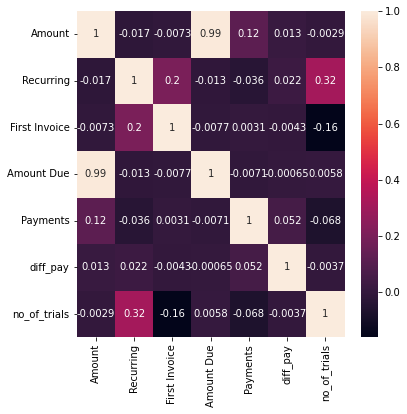

In [91]:
plt.figure(figsize=(6,6))
sns.heatmap(df_final.corr(), annot = True)

<AxesSubplot:xlabel='Amount Due', ylabel='Density'>

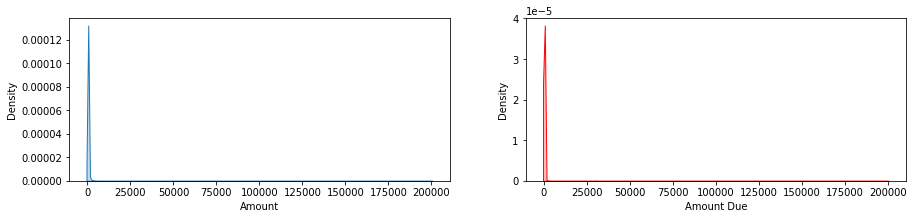

In [92]:
#distplot for Amount and Amount Due
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.kdeplot(df_final["Amount"], shade = True)

plt.subplot(1,2,2)
sns.kdeplot(df_final["Amount Due"],shade = True, color = "r")

<AxesSubplot:xlabel='diff_pay', ylabel='Density'>

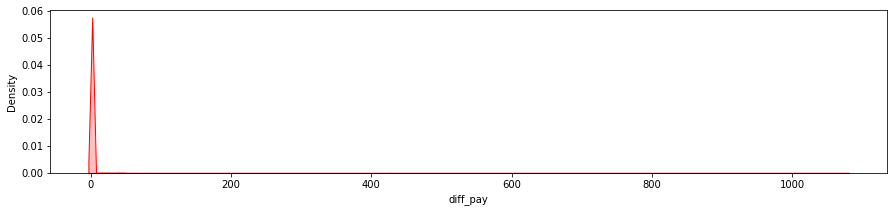

In [93]:
#distplot for differnce in pay and countplot for no of trials
plt.figure(figsize=(15,3))
sns.kdeplot(df_final["diff_pay"],shade = True, color = "r")

[Text(0, 0, '31618'),
 Text(0, 0, '3618'),
 Text(0, 0, '2106'),
 Text(0, 0, '1718'),
 Text(0, 0, '1038'),
 Text(0, 0, '941'),
 Text(0, 0, '302'),
 Text(0, 0, '139'),
 Text(0, 0, '66'),
 Text(0, 0, '27'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

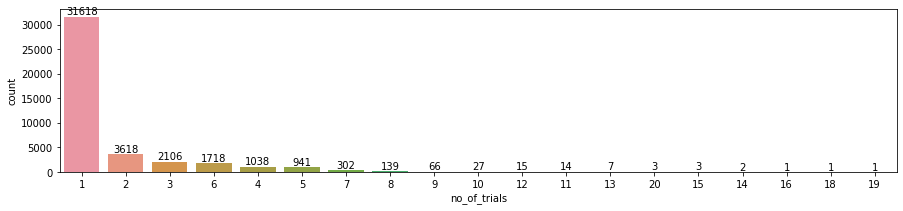

In [94]:
plt.figure(figsize=(15,3))
ax = sns.countplot(x=df_final['no_of_trials'],
                   order=df_final['no_of_trials'].value_counts(ascending=False).index);

abs_values = df_final['no_of_trials'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

In [95]:
df_final.columns

Index(['Invoice Number', 'Amount', 'Status', 'Recurring', 'First Invoice',
       'Amount Due', 'Payments', 'Currency', 'diff_pay', 'Type',
       'Payment Method', 'Error Code', 'Error Text', 'Gateway', 'Card Type',
       'no_of_trials'],
      dtype='object')

<AxesSubplot:xlabel='Recurring', ylabel='count'>

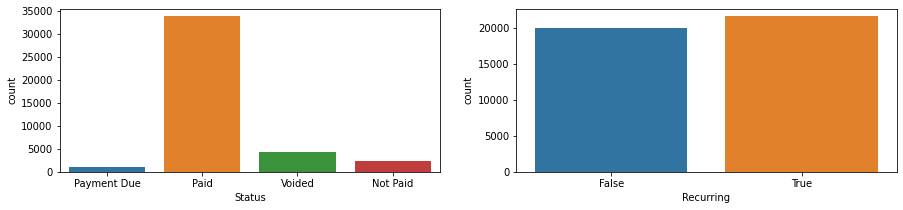

In [96]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(df_final['Status'])

plt.subplot(1,2,2)
sns.countplot(df_final['Recurring'])

<AxesSubplot:xlabel='Currency', ylabel='count'>

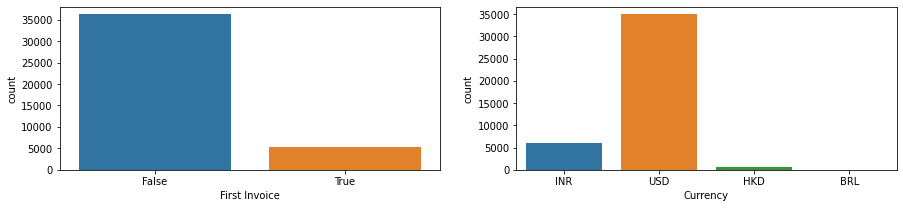

In [97]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(df_final['First Invoice'])

plt.subplot(1,2,2)
sns.countplot(df_final['Currency'])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Card'),
  Text(1, 0, 'Paypal Express Checkout'),
  Text(2, 0, 'Bank Transfer'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Chargeback'),
  Text(5, 0, 'Check'),
  Text(6, 0, 'Cash')])

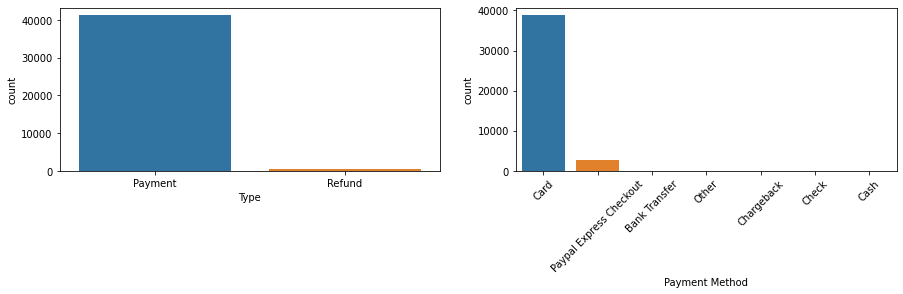

In [98]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(df_final['Type'])

plt.subplot(1,2,2)
sns.countplot(df_final['Payment Method'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Card Type', ylabel='count'>

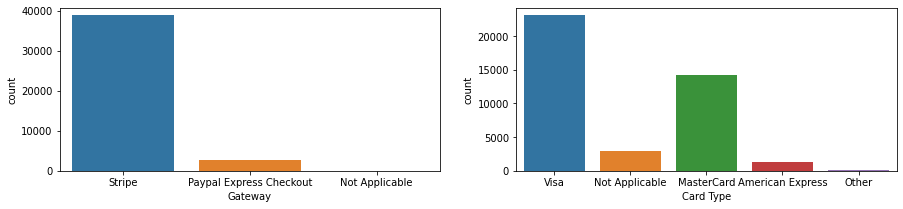

In [99]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(df_final['Gateway'])

plt.subplot(1,2,2)
sns.countplot(df_final['Card Type'])

In [100]:
print(df_final["Error Code"].value_counts())

card_declined                               11286
10417                                         317
incorrect_number                              308
payment_intent_mandate_invalid                262
card_decline_rate_limit_exceeded              251
expired_card                                  202
processing_error                               24
authentication_required                        17
10207                                          14
amount_too_small                                5
india_recurring_payment_mandate_canceled        5
resource_missing                                1
Name: Error Code, dtype: int64


<AxesSubplot:xlabel='Status', ylabel='no_of_trials'>

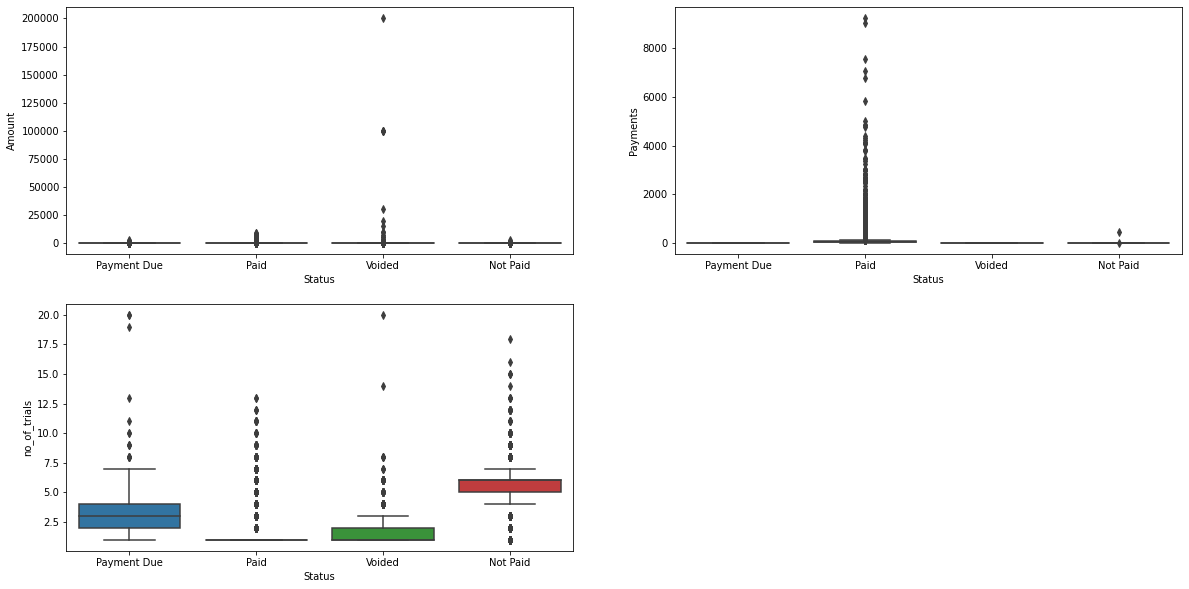

In [101]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data = df_final, x = 'Status', y = 'Amount')

plt.subplot(2,2,2)
sns.boxplot(data = df_final, x = 'Status', y = 'Payments')

plt.subplot(2,2,3)
sns.boxplot(data = df_final, x = 'Status', y = 'no_of_trials')

## <span style='background :yellow' > Important Inference: <span/>

In [102]:
df_final[['Status', 'Amount']].groupby('Status')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Not Paid,2423.0,57.651259,78.634140,9.0,35.0,49.0,49.0,3060.0
Paid,33845.0,77.484267,197.158265,1.0,31.0,49.0,70.0,9229.0
Payment Due,1133.0,75.491615,139.339162,1.0,35.0,49.0,70.0,2880.0
Voided,4219.0,226.440389,4402.015923,0.0,10.0,20.0,50.0,200000.0


In [103]:
df_final[['Status', 'no_of_trials']].groupby('Status')['no_of_trials'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Not Paid,2423.0,5.603384,1.663452,1.0,5.0,6.0,6.0,18.0
Paid,33845.0,1.338071,1.012944,1.0,1.0,1.0,1.0,13.0
Payment Due,1133.0,2.883495,1.808554,1.0,2.0,3.0,4.0,20.0
Voided,4219.0,1.637118,1.030294,1.0,1.0,1.0,2.0,20.0


In [104]:
pd.crosstab(df_final['no_of_trials'], df_final['Status'], margins = True)

Status,Not Paid,Paid,Payment Due,Voided,All
no_of_trials,,,,,
1,34,28670,273,2641,31618
2,82,2510,252,774,3618
3,130,1113,251,612,2106
4,181,529,185,143,1038
5,435,364,125,17,941
6,1257,415,23,23,1718
7,101,190,8,3,302
8,106,23,6,4,139
9,51,12,3,0,66


In [105]:
pd.crosstab(df_final['no_of_trials'],df_final['Status'],normalize = True, margins = True)

Status,Not Paid,Paid,Payment Due,Voided,All
no_of_trials,,,,,
1,0.000817,0.688852,0.006559,0.063455,0.759683
2,0.001970,0.060308,0.006055,0.018597,0.086929
3,0.003123,0.026742,0.006031,0.014704,0.050601
4,0.004349,0.012710,0.004445,0.003436,0.024940
5,0.010452,0.008746,0.003003,0.000408,0.022609
6,0.030202,0.009971,0.000553,0.000553,0.041278
7,0.002427,0.004565,0.000192,0.000072,0.007256
8,0.002547,0.000553,0.000144,0.000096,0.003340
9,0.001225,0.000288,0.000072,0.000000,0.001586


In [106]:
pd.crosstab(df_final['Recurring'],df_final['Status'],normalize = True, margins = True)

Status,Not Paid,Paid,Payment Due,Voided,All
Recurring,,,,,
False,0.000000,0.379481,0.001898,0.099183,0.480562
True,0.058217,0.433710,0.025324,0.002186,0.519438
All,0.058217,0.813191,0.027222,0.101370,1.000000


In [107]:
pd.crosstab(df_final['First Invoice'],df_final['Status'],normalize = True, margins = True)

Status,Not Paid,Paid,Payment Due,Voided,All
First Invoice,,,,,
False,0.058217,0.683686,0.027030,0.10137,0.870303
True,0.000000,0.129505,0.000192,0.00000,0.129697
All,0.058217,0.813191,0.027222,0.10137,1.000000


In [108]:
pd.crosstab(df_final['Currency'],df_final['Status'],normalize = True, margins = True)

Status,Not Paid,Paid,Payment Due,Voided,All
Currency,,,,,
BRL,0.000024,0.001490,0.000024,0.000000,0.001538
HKD,0.000360,0.014176,0.000577,0.000000,0.015113
INR,0.021961,0.109154,0.012158,0.001201,0.144474
USD,0.035872,0.688371,0.014464,0.100168,0.838876
All,0.058217,0.813191,0.027222,0.101370,1.000000


In [109]:
pd.crosstab(df_final['Type'],df_final['Status'],normalize = True, margins = True)

Status,Not Paid,Paid,Payment Due,Voided,All
Type,,,,,
Payment,0.058217,0.803172,0.027222,0.10137,0.989981
Refund,0.000000,0.010019,0.000000,0.00000,0.010019
All,0.058217,0.813191,0.027222,0.10137,1.000000


In [110]:
pd.crosstab(df_final['Payment Method'],df_final['Status'],normalize = True, margins = True)

Status,Not Paid,Paid,Payment Due,Voided,All
Payment Method,,,,,
Bank Transfer,0.000000,0.000577,0.000000,0.000000,0.000577
Card,0.057016,0.750048,0.026886,0.096925,0.930875
Cash,0.000000,0.000024,0.000000,0.000000,0.000024
Chargeback,0.000000,0.000601,0.000000,0.000000,0.000601
Check,0.000000,0.000360,0.000000,0.000000,0.000360
Other,0.000000,0.000697,0.000000,0.000000,0.000697
Paypal Express Checkout,0.001201,0.060884,0.000336,0.004445,0.066867
All,0.058217,0.813191,0.027222,0.101370,1.000000


```
Payment done through Paypal Express Checkout has higher chance of Not Paid, Payment Due and Voided.
```

In [111]:
pd.crosstab(df_final['Gateway'],df_final['Status'],normalize = True, margins = True)

Status,Not Paid,Paid,Payment Due,Voided,All
Gateway,,,,,
Not Applicable,0.000000,0.001682,0.000000,0.000000,0.001682
Paypal Express Checkout,0.001201,0.060884,0.000336,0.004445,0.066867
Stripe,0.057016,0.750625,0.026886,0.096925,0.931451
All,0.058217,0.813191,0.027222,0.101370,1.000000


In [112]:
pd.crosstab(df_final['Card Type'],df_final['Status'],normalize = True, margins = True)

Status,Not Paid,Paid,Payment Due,Voided,All
Card Type,,,,,
American Express,0.001321,0.028063,0.000553,0.001778,0.031716
MasterCard,0.018501,0.278736,0.009635,0.034695,0.341567
Not Applicable,0.001201,0.063143,0.000336,0.004445,0.069125
Other,0.000072,0.004109,0.000096,0.000096,0.004373
Visa,0.037122,0.439140,0.016603,0.060356,0.553220
All,0.058217,0.813191,0.027222,0.101370,1.000000


```
Payment done via **American Express** Card Type has higher chance of Voided and Not Paid
Payment done via **Master Card** card Type has higher chance of Voided, Not Paid and Payment Due.
```

In [113]:
pd.crosstab([df_final['Status'],df_final['Currency']], df_final['Recurring'], normalize = True, margins = True)

Recurring                False      True       All
Status      Currency                              
Not Paid    BRL       0.000000  0.000024  0.000024
            HKD       0.000000  0.000360  0.000360
            INR       0.000000  0.021961  0.021961
            USD       0.000000  0.035872  0.035872
Paid        BRL       0.000000  0.001490  0.001490
            HKD       0.000072  0.014104  0.014176
            INR       0.000024  0.109130  0.109154
            USD       0.379385  0.308986  0.688371
Payment Due BRL       0.000000  0.000024  0.000024
            HKD       0.000000  0.000577  0.000577
            INR       0.000000  0.012158  0.012158
            USD       0.001898  0.012566  0.014464
Voided      INR       0.000024  0.001177  0.001201
            USD       0.099159  0.001009  0.100168
All                   0.480562  0.519438  1.000000

```
Payment done in USD and if it's non-Recurring then chances of getting Voided is higher.
```

In [114]:
pd.crosstab([df_final['Card Type'], df_final['Payment Method'], df_final['Gateway']], df_final['Status'], normalize = True, margins = True)

Status                                                            Not Paid  \
Card Type        Payment Method          Gateway                             
American Express Card                    Stripe                   0.001321   
MasterCard       Card                    Stripe                   0.018501   
Not Applicable   Bank Transfer           Not Applicable           0.000000   
                 Cash                    Not Applicable           0.000000   
                 Chargeback              Not Applicable           0.000000   
                                         Stripe                   0.000000   
                 Check                   Not Applicable           0.000000   
                 Other                   Not Applicable           0.000000   
                 Paypal Express Checkout Paypal Express Checkout  0.001201   
Other            Card                    Stripe                   0.000072   
Visa             Card                    Stripe                   0.037122   
All                                                               0.058217   

Status                                                                Paid  \
Card Type        Payment Method          Gateway                             
American Express Card                    Stripe                   0.028063   
MasterCard       Card                    Stripe                   0.278736   
Not Applicable   Bank Transfer           Not Applicable           0.000577   
                 Cash                    Not Applicable           0.000024   
                 Chargeback              Not Applicable           0.000024   
                                         Stripe                   0.000577   
                 Check                   Not Applicable           0.000360   
                 Other                   Not Applicable           0.000697   
                 Paypal Express Checkout Paypal Express Checkout  0.060884   
Other            Card                    Stripe                   0.004109   
Visa             Card                    Stripe                   0.439140   
All                                                               0.813191   

Status                                                            Payment Due  \
Card Type        Payment Method          Gateway                                
American Express Card                    Stripe                      0.000553   
MasterCard       Card                    Stripe                      0.009635   
Not Applicable   Bank Transfer           Not Applicable              0.000000   
                 Cash                    Not Applicable              0.000000   
                 Chargeback              Not Applicable              0.000000   
                                         Stripe                      0.000000   
                 Check                   Not Applicable              0.000000   
                 Other                   Not Applicable              0.000000   
                 Paypal Express Checkout Paypal Express Checkout     0.000336   
Other            Card                    Stripe                      0.000096   
Visa             Card                    Stripe                      0.016603   
All                                                                  0.027222   

Status                                                              Voided  \
Card Type        Payment Method          Gateway                             
American Express Card                    Stripe                   0.001778   
MasterCard       Card                    Stripe                   0.034695   
Not Applicable   Bank Transfer           Not Applicable           0.000000   
                 Cash                    Not Applicable           0.000000   
                 Chargeback              Not Applicable           0.000000   
                                         Stripe                   0.000000   
                 Check                   Not Applicable

In [115]:
df_final.columns

Index(['Invoice Number', 'Amount', 'Status', 'Recurring', 'First Invoice',
       'Amount Due', 'Payments', 'Currency', 'diff_pay', 'Type',
       'Payment Method', 'Error Code', 'Error Text', 'Gateway', 'Card Type',
       'no_of_trials'],
      dtype='object')

<AxesSubplot:xlabel='Status', ylabel='count'>

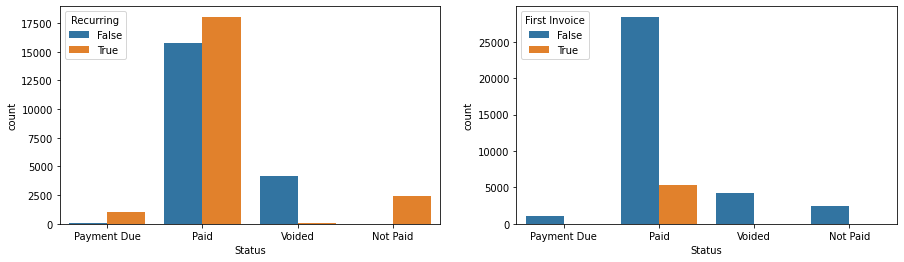

In [116]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = df_final, x = 'Status', hue = 'Recurring')
    
plt.subplot(1,2,2)
sns.countplot(data = df_final, x = 'Status', hue = 'First Invoice')

<AxesSubplot:xlabel='Status', ylabel='count'>

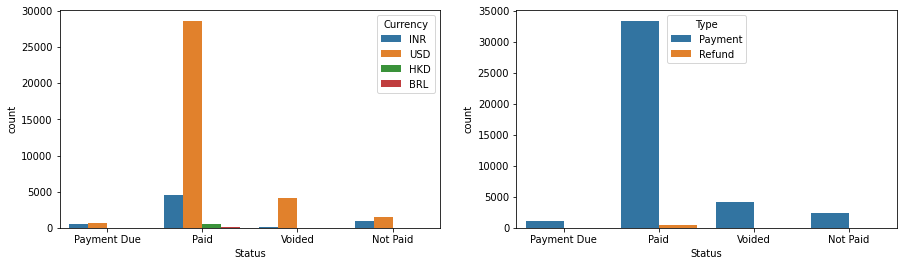

In [117]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = df_final, x = 'Status', hue = 'Currency')

plt.subplot(1,2,2)
sns.countplot(data = df_final, x = 'Status', hue = 'Type')

<AxesSubplot:xlabel='Status', ylabel='count'>

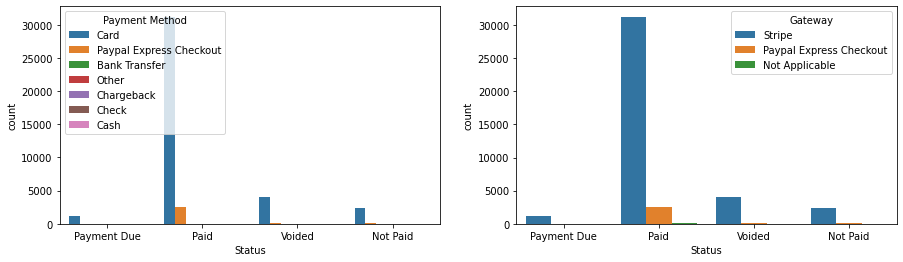

In [118]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = df_final, x = 'Status', hue = 'Payment Method')

plt.subplot(1,2,2)
sns.countplot(data = df_final, x = 'Status', hue = 'Gateway')

<AxesSubplot:xlabel='Status', ylabel='count'>

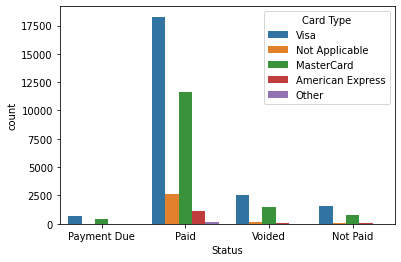

In [119]:
sns.countplot(data = df_final, x = 'Status', hue = 'Card Type')

<AxesSubplot:xlabel='Amount', ylabel='no_of_trials'>

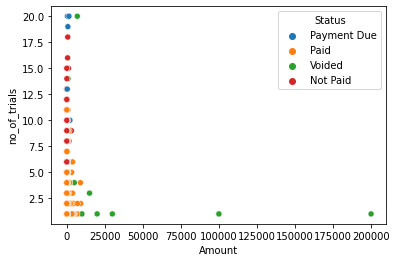

In [120]:
sns.scatterplot(data = df_final, x = "Amount", y = "no_of_trials", hue = "Status")

<AxesSubplot:xlabel='no_of_trials', ylabel='Amount'>

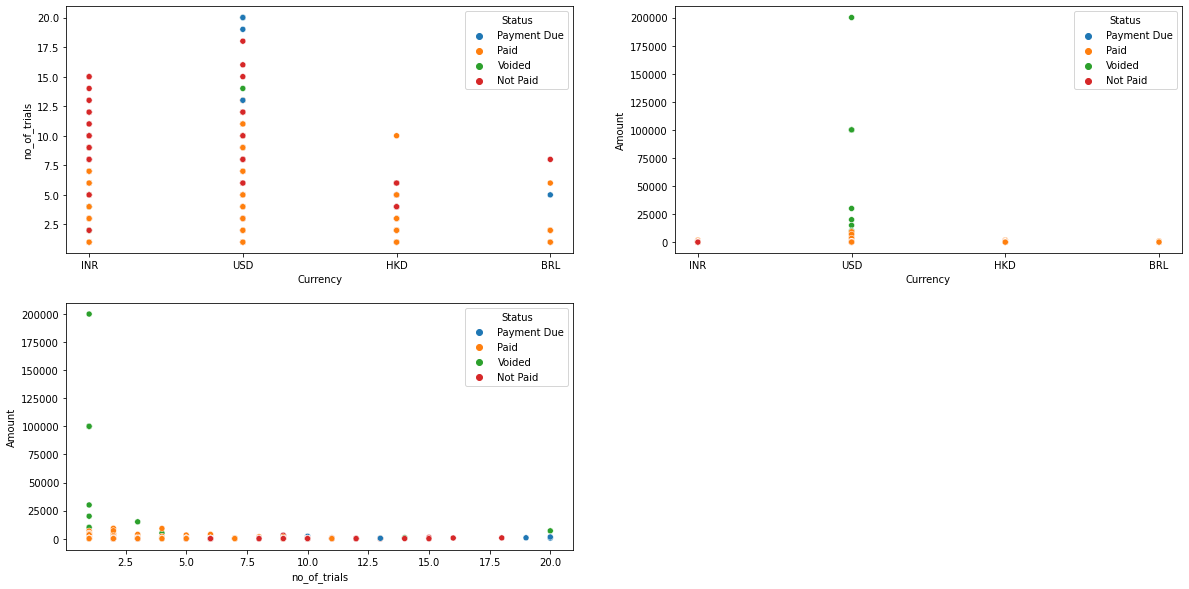

In [121]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(y='no_of_trials', x='Currency', data=df_final, hue='Status')

plt.subplot(2,2,2)
sns.scatterplot(y='Amount', x='Currency', data=df_final, hue='Status')

plt.subplot(2,2,3)
sns.scatterplot(y='Amount', x='no_of_trials', data=df_final, hue='Status')

<AxesSubplot:xlabel='no_of_trials', ylabel='Amount'>

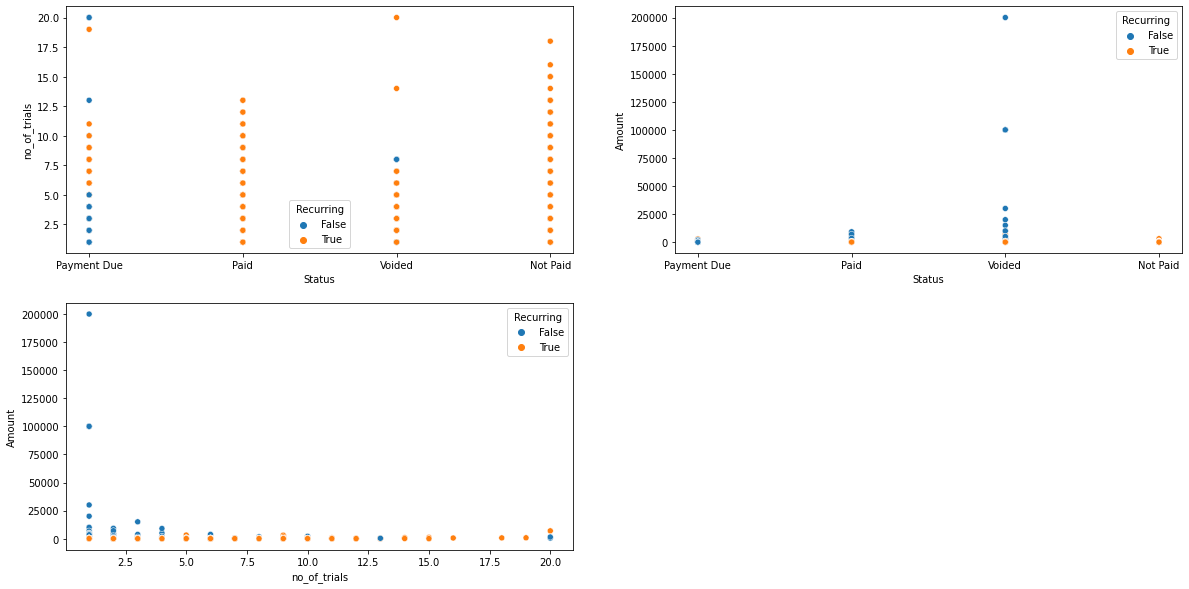

In [122]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(y='no_of_trials', x='Status', data=df_final, hue='Recurring')

plt.subplot(2,2,2)
sns.scatterplot(y='Amount', x='Status', data=df_final, hue='Recurring')

plt.subplot(2,2,3)
sns.scatterplot(y='Amount', x='no_of_trials', data=df_final, hue='Recurring')

## <span style='background :yellow' > Insights and Inferences:` <span/>

### Insights and Patterns:
- Column recurring has a strong relation with no of trials.
- Highest Error Code seen is **Card Declined.**
- Payment Due transactions have tried the most no of times to make the payment, on average they have tried **thrice.**
- Also Not Paid transactions have tried more no of times to make the payment, on average they have tried **6 times.**
- Median of Voided transactions had an amount **USD 20 (payment) and average is USD 226**
- As **no of trials goes to 5**,the chances of transaction getting Not Paid, Due and Voided Increases.
- When the Transaction is not the Recurring there is good chance of getting Voided
- When the Transaction is not the First Invoice there is good chance of getting Payment Due and Voided.
- Payment done in INR has higher chances of Not Paid and Payment Due
- Payment done through Paypal Express Checkout has higher chance of Not Paid, Payment Due and Voided.
- Payment done via **American Express** Card Type has higher chance of Voided and Not Paid
- Payment done via **MasterCard** card Type has higher chance of Voided, Not Paid and Payment Due.
- Payment done via **Paypal Expess Checkout** has higher chance of Voided
- Payment done in USD and if it's non-Recurring then chances of getting Voided is higher.
- Amount above USD 10000 has higher chances of getting void

### Actionable Insights:
- Once the payment trial goes above 4/5, try giving a pop to change the card.
- High amount transaction can be adviced to make a bank transfer

# <span style='background :yellow' > Data3:                                                                             <span/>

In [123]:
#importing data from Data 1 sheet
data3 = pd.read_excel('C:/Users/Rajeshri Jogi/Desktop/WATI/Bizops Associate - assignment data.xlsx',sheet_name= 'Data 3',  engine='openpyxl')

In [124]:
data3.head()

,id,Seller Message,Created (UTC),Amount,Amount Refunded,Currency,Converted Amount,Converted Amount Refunded,Fee,Converted Currency,...,Card Brand,Card Funding,Payment Source Type,Card Exp Month,Card Exp Year,Card Address Country,Card Issue Country,Card CVC Status,Card AVS Zip Status,Card AVS Line1 Status
0,ch_3Ld0nfJCAUNUpKy8022NsLAq,Payment complete.,2022-08-31 23:58:00,98.0,0.0,usd,98.0,0.0,3.63,usd,...,Visa,prepaid,card,4,2023,NaN,GA,pass,NaN,NaN
1,ch_3Ld0jSJCAUNUpKy81hCCVeyQ,Payment complete.,2022-08-31 23:54:00,30.0,0.0,usd,30.0,0.0,1.32,usd,...,Visa,debit,card,12,2023,NaN,MX,pass,NaN,NaN
2,ch_3Ld0j7JCAUNUpKy80KO5Repe,The bank returned the decline code `insufficie...,2022-08-31 23:53:00,30.0,0.0,usd,30.0,0.0,0.00,usd,...,Visa,debit,card,8,2024,NaN,MX,pass,NaN,NaN
3,ch_3Ld0ixJCAUNUpKy81n8Pqwce,The bank returned the decline code `expired_ca...,2022-08-31 23:53:00,98.0,0.0,usd,98.0,0.0,0.00,usd,...,MasterCard,debit,card,9,2026,NaN,MX,pass,NaN,NaN
4,ch_3Ld0FoJCAUNUpKy81wY3a8Rr,Payment complete.,2022-08-31 23:23:00,158.0,0.0,usd,158.0,0.0,5.67,usd,...,Visa,credit,card,7,2024,NaN,CO,pass,NaN,NaN


In [125]:
data3.shape

(51935, 24)

In [126]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51935 entries, 0 to 51934
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         51935 non-null  object        
 1   Seller Message             51424 non-null  object        
 2   Created (UTC)              51935 non-null  datetime64[ns]
 3   Amount                     51935 non-null  float64       
 4   Amount Refunded            51935 non-null  float64       
 5   Currency                   51935 non-null  object        
 6   Converted Amount           51935 non-null  float64       
 7   Converted Amount Refunded  51935 non-null  float64       
 8   Fee                        51935 non-null  float64       
 9   Converted Currency         51935 non-null  object        
 10  Mode                       51935 non-null  object        
 11  Status                     51935 non-null  object        
 12  Capt

In [127]:
#change dtype
data3['Card Last4'] = data3['Card Last4'].astype('object')
data3['Card Exp Month'] = data3['Card Exp Month'].astype('object')
data3['Card Exp Year'] = data3['Card Exp Year'].astype('object')

In [128]:
data3.describe()

,Amount,Amount Refunded,Converted Amount,Converted Amount Refunded,Fee
count,51935.000000,51935.000000,51935.000000,51935.000000,51935.000000
mean,757.186873,7.882071,501.024522,0.910834,1.554086
std,2373.454240,167.905586,1965.196090,43.756916,7.036798
min,0.590000,0.000000,0.590000,0.000000,0.000000
25%,40.000000,0.000000,39.200000,0.000000,0.000000
50%,49.000000,0.000000,49.000000,0.000000,0.000000
75%,200.000000,0.000000,100.000000,0.000000,1.970000
max,200000.000000,8700.000000,200000.000000,7668.000000,575.860000


In [129]:
data3.describe(include=[object, bool])

,id,Seller Message,Currency,Converted Currency,Mode,Status,Captured,Card Last4,Card Brand,Card Funding,Payment Source Type,Card Exp Month,Card Exp Year,Card Address Country,Card Issue Country,Card CVC Status,Card AVS Zip Status,Card AVS Line1 Status
count,51935,51424,51935,51935,51935,51935,51935,51935,51935,51935,51935,51935,51935,6430,51934,51497,520,181
unique,51930,27,4,4,1,3,2,4618,5,3,1,12,13,64,116,4,4,2
top,ch_3Lb1biJCAUNUpKy80vs1D3ZE,Payment complete.,usd,usd,Live,Failed,False,8896,Visa,credit,card,8,2024,IN,IN,pass,pass,unavailable
freq,4,23117,42049,45519,51935,28813,28841,344,31937,33253,51935,5409,11029,3045,26668,44097,241,172


In [130]:
data3.duplicated().value_counts()

False    51932
True         3
dtype: int64

## <span style='background :yellow' > Data3: Data Cleaning and Processing <span/>

In [131]:
df3 = data3.copy(deep=True)

In [132]:
df3 = df3.drop_duplicates()
df3.shape

(51932, 24)

In [133]:
df3.describe(include=[object, bool])

,id,Seller Message,Currency,Converted Currency,Mode,Status,Captured,Card Last4,Card Brand,Card Funding,Payment Source Type,Card Exp Month,Card Exp Year,Card Address Country,Card Issue Country,Card CVC Status,Card AVS Zip Status,Card AVS Line1 Status
count,51932,51421,51932,51932,51932,51932,51932,51932,51932,51932,51932,51932,51932,6430,51931,51494,520,181
unique,51930,27,4,4,1,3,2,4618,5,3,1,12,13,64,116,4,4,2
top,ch_3LTPcVJCAUNUpKy80pU4V5dx,Payment complete.,usd,usd,Live,Failed,False,8896,Visa,credit,card,8,2024,IN,IN,pass,pass,unavailable
freq,2,23114,42046,45516,51932,28813,28841,344,31934,33250,51932,5409,11029,3045,26665,44094,241,172


In [134]:
#checking duplicate transaction ids
df3[df3['id']=='ch_3LTPcVJCAUNUpKy80pU4V5dx']

,id,Seller Message,Created (UTC),Amount,Amount Refunded,Currency,Converted Amount,Converted Amount Refunded,Fee,Converted Currency,...,Card Brand,Card Funding,Payment Source Type,Card Exp Month,Card Exp Year,Card Address Country,Card Issue Country,Card CVC Status,Card AVS Zip Status,Card AVS Line1 Status
17200,ch_3LTPcVJCAUNUpKy80pU4V5dx,Payment complete.,2022-08-05 12:27:00,98.0,98.0,usd,98.0,24.57,3.63,usd,...,MasterCard,credit,card,12,2023,NaN,KW,pass,NaN,NaN
17201,ch_3LTPcVJCAUNUpKy80pU4V5dx,Payment complete.,2022-08-05 12:27:00,98.0,98.0,usd,98.0,73.43,3.63,usd,...,MasterCard,credit,card,12,2023,NaN,KW,pass,NaN,NaN


In [135]:
#checking duplicate transaction ids
df3[df3['id']=='ch_3LH1jdJCAUNUpKy81HxEfiKi']

,id,Seller Message,Created (UTC),Amount,Amount Refunded,Currency,Converted Amount,Converted Amount Refunded,Fee,Converted Currency,...,Card Brand,Card Funding,Payment Source Type,Card Exp Month,Card Exp Year,Card Address Country,Card Issue Country,Card CVC Status,Card AVS Zip Status,Card AVS Line1 Status
35660,ch_3LH1jdJCAUNUpKy81HxEfiKi,Payment complete.,2022-07-02 08:31:00,200.0,134.0,usd,200.0,100.0,7.1,usd,...,Visa,debit,card,9,2022,NaN,IN,pass,NaN,NaN
35661,ch_3LH1jdJCAUNUpKy81HxEfiKi,Payment complete.,2022-07-02 08:31:00,200.0,134.0,usd,200.0,34.0,7.1,usd,...,Visa,debit,card,9,2022,NaN,IN,pass,NaN,NaN


In [136]:
#checking duplicate transaction ids
df3['id'].value_counts()

ch_3LTPcVJCAUNUpKy80pU4V5dx    2
ch_3LH1jdJCAUNUpKy81HxEfiKi    2
ch_3Ld0nfJCAUNUpKy8022NsLAq    1
ch_3LHqmqJCAUNUpKy814XSEPnr    1
ch_3LHrizJCAUNUpKy80kcFgTrS    1
                              ..
ch_3LTMspJCAUNUpKy81qvn1YNm    1
ch_3LTMrbJCAUNUpKy81KKsywMS    1
ch_3LTMn4JCAUNUpKy801p6FQz2    1
ch_3LSHLBJCAUNUpKy80U6GbnoV    1
ch_3L5fGsJCAUNUpKy80IbK48J2    1
Name: id, Length: 51930, dtype: int64

In [137]:
df3.columns

Index(['id', 'Seller Message', 'Created (UTC)', 'Amount', 'Amount Refunded',
       'Currency', 'Converted Amount', 'Converted Amount Refunded', 'Fee',
       'Converted Currency', 'Mode', 'Status', 'Captured', 'Card Last4',
       'Card Brand', 'Card Funding', 'Payment Source Type', 'Card Exp Month',
       'Card Exp Year', 'Card Address Country', 'Card Issue Country',
       'Card CVC Status', 'Card AVS Zip Status', 'Card AVS Line1 Status'],
      dtype='object')

In [138]:
#groupby on transaction id
df3 = df3.groupby('id', as_index=False).agg({'Seller Message':'first', 'Created (UTC)':'first', 'Amount':'first', 'Amount Refunded':'first',
       'Currency':'first', 'Converted Amount':'first', 'Converted Amount Refunded':'sum', 'Fee':'first',
       'Converted Currency':'first', 'Mode':'first', 'Status':'first', 'Captured':'first', 'Card Last4':'first',
       'Card Brand':'first', 'Card Funding':'first', 'Payment Source Type':'first', 'Card Exp Month':'first',
       'Card Exp Year':'first', 'Card Address Country':'first', 'Card Issue Country':'first',
       'Card CVC Status':'first', 'Card AVS Zip Status':'first', 'Card AVS Line1 Status':'first'})

In [139]:
df3.shape

(51930, 24)

In [140]:
df3['id'].value_counts()

ch_3L4aDEJCAUNUpKy80alCvhlu    1
ch_3LTJBJJCAUNUpKy81oJ6eFnP    1
ch_3LTIzHJCAUNUpKy81UrxbRkL    1
ch_3LTIzbJCAUNUpKy81X0qoetz    1
ch_3LTJ1zJCAUNUpKy81piMc92h    1
                              ..
ch_3LHnCNJCAUNUpKy81jWp8X3x    1
ch_3LHnDJJCAUNUpKy80eMKEmtT    1
ch_3LHnDvJCAUNUpKy81MQQShBX    1
ch_3LHnEKJCAUNUpKy81MmiR8e6    1
ch_3Ld0nfJCAUNUpKy8022NsLAq    1
Name: id, Length: 51930, dtype: int64

In [141]:
#checking if data2 anmd data3 are related
data2['Transaction Id'].isin(df3['id']).value_counts()

False    69351
Name: Transaction Id, dtype: int64

In [142]:
#checking if data2 anmd data3 are related
df3['id'].isin(data2['Transaction Id']).value_counts()

False    51930
Name: id, dtype: int64

In [143]:
df3.isnull().sum()

id                               0
Seller Message                 511
Created (UTC)                    0
Amount                           0
Amount Refunded                  0
Currency                         0
Converted Amount                 0
Converted Amount Refunded        0
Fee                              0
Converted Currency               0
Mode                             0
Status                           0
Captured                         0
Card Last4                       0
Card Brand                       0
Card Funding                     0
Payment Source Type              0
Card Exp Month                   0
Card Exp Year                    0
Card Address Country         45500
Card Issue Country               1
Card CVC Status                438
Card AVS Zip Status          51410
Card AVS Line1 Status        51749
dtype: int64

In [144]:
#drop unique columns
df3.drop(['id','Mode'], axis = 1, inplace = True)

In [145]:
df3.head()

,Seller Message,Created (UTC),Amount,Amount Refunded,Currency,Converted Amount,Converted Amount Refunded,Fee,Converted Currency,Status,...,Card Brand,Card Funding,Payment Source Type,Card Exp Month,Card Exp Year,Card Address Country,Card Issue Country,Card CVC Status,Card AVS Zip Status,Card AVS Line1 Status
0,The bank returned the decline code `do_not_hon...,2022-06-01 00:43:00,510.58,0.0,inr,510.58,0.0,0.00,inr,Failed,...,MasterCard,debit,card,5,2026,None,IN,pass,None,None
1,Payment complete.,2022-06-01 01:39:00,2900.00,0.0,inr,36.62,0.0,1.55,usd,Paid,...,Visa,credit,card,12,2026,None,IN,unchecked,None,None
2,The bank returned the decline code `do_not_hon...,2022-06-01 05:03:00,2900.00,0.0,inr,2900.00,0.0,0.00,inr,Failed,...,MasterCard,credit,card,6,2024,None,IN,unchecked,None,None
3,The bank returned the decline code `transactio...,2022-06-01 05:39:00,2900.00,0.0,inr,2900.00,0.0,0.00,inr,Failed,...,Visa,credit,card,3,2023,None,IN,pass,None,None
4,The bank returned the decline code `do_not_hon...,2022-06-01 06:00:00,2900.00,0.0,inr,2900.00,0.0,0.00,inr,Failed,...,MasterCard,credit,card,6,2023,None,IN,pass,None,None


In [146]:
df3.describe()

,Amount,Amount Refunded,Converted Amount,Converted Amount Refunded,Fee
count,51930.000000,51930.000000,51930.000000,51930.000000,51930.000000
mean,757.233819,7.866809,501.046805,0.908033,1.553324
std,2373.563461,167.905941,1965.289123,43.759722,7.036623
min,0.590000,0.000000,0.590000,0.000000,0.000000
25%,40.000000,0.000000,39.200000,0.000000,0.000000
50%,49.000000,0.000000,49.000000,0.000000,0.000000
75%,200.000000,0.000000,100.000000,0.000000,1.970000
max,200000.000000,8700.000000,200000.000000,7668.000000,575.860000


In [147]:
df3.describe(include=[object, bool])

,Seller Message,Currency,Converted Currency,Status,Captured,Card Last4,Card Brand,Card Funding,Payment Source Type,Card Exp Month,Card Exp Year,Card Address Country,Card Issue Country,Card CVC Status,Card AVS Zip Status,Card AVS Line1 Status
count,51419,51930,51930,51930,51930,51930,51930,51930,51930,51930,51930,6430,51929,51492,520,181
unique,27,4,4,3,2,4618,5,3,1,12,13,64,116,4,4,2
top,Payment complete.,usd,usd,Failed,False,8896,Visa,credit,card,8,2024,IN,IN,pass,pass,unavailable
freq,23112,42044,45514,28813,28841,344,31933,33249,51930,5409,11029,3045,26664,44092,241,172


In [148]:
#checking value counts
df3['Seller Message'].value_counts().to_frame()

,Seller Message
Payment complete.,23112
The bank returned the decline code `transaction_not_allowed`.,8906
The bank returned the decline code `do_not_honor`.,8122
The bank returned the decline code `insufficient_funds`.,5682
The bank returned the decline code `incorrect_number`.,1397
"You previously attempted to charge this card. When the customer's bank declined that payment, it directed Stripe to block future attempts.",1099
The bank returned the decline code `expired_card`.,837
The bank returned the decline code `pickup_card`.,623
The bank returned the decline code `try_again_later`.,412
Unfortunately you can't create charges in this currency with this card brand.,289


In [149]:
#checking value counts
df3.Currency.value_counts()

usd    42044
inr     9325
hkd      510
brl       51
Name: Currency, dtype: int64

In [150]:
#checking value counts
df3.Status.value_counts()

Failed      28813
Paid        22806
Refunded      311
Name: Status, dtype: int64

In [151]:
#checking value counts
df3.Captured.value_counts()

False    28841
True     23089
Name: Captured, dtype: int64

In [152]:
#checking value counts
df3['Card Last4'].value_counts()

8896    344
571     337
3856    333
3008    296
3764    284
       ... 
3493      1
6846      1
3914      1
3045      1
1936      1
Name: Card Last4, Length: 4618, dtype: int64

In [153]:
#checking value counts
df3[df3['Card Last4']==8896].head(5)

,Seller Message,Created (UTC),Amount,Amount Refunded,Currency,Converted Amount,Converted Amount Refunded,Fee,Converted Currency,Status,...,Card Brand,Card Funding,Payment Source Type,Card Exp Month,Card Exp Year,Card Address Country,Card Issue Country,Card CVC Status,Card AVS Zip Status,Card AVS Line1 Status
3419,Payment complete.,2022-06-08 10:40:00,100.0,0.0,usd,100.0,0.0,3.70,usd,Paid,...,Visa,debit,card,6,2025,None,PH,pass,None,None
3423,Payment complete.,2022-06-08 10:43:00,80.0,0.0,usd,80.0,0.0,3.02,usd,Paid,...,Visa,debit,card,6,2025,None,PH,pass,None,None
3438,Payment complete.,2022-06-08 11:01:00,100.0,0.0,usd,100.0,0.0,3.70,usd,Paid,...,Visa,debit,card,6,2025,None,PH,pass,None,None
3441,Payment complete.,2022-06-08 11:01:00,100.0,0.0,usd,100.0,0.0,3.70,usd,Paid,...,Visa,debit,card,6,2025,None,PH,pass,None,None
3442,Payment complete.,2022-06-08 11:02:00,100.0,0.0,usd,100.0,0.0,3.70,usd,Paid,...,Visa,debit,card,6,2025,None,PH,pass,None,None


In [154]:
#checking value counts
df3[df3['Card Last4']==8896]['Amount'].value_counts()

100.0    116
49.0      58
50.0      58
90.0      22
80.0      21
30.0      18
60.0      10
15.0       9
70.0       8
399.0      5
20.0       4
40.0       4
85.0       3
150.0      3
98.0       2
10.0       2
75.0       1
Name: Amount, dtype: int64

In [155]:
df3['Card Brand'].value_counts()

Visa                31933
MasterCard          17841
American Express     1940
UnionPay              215
Diners Club             1
Name: Card Brand, dtype: int64

In [156]:
#checking value counts
df3['Card Funding'].value_counts()

credit     33249
debit      16592
prepaid     2089
Name: Card Funding, dtype: int64

In [157]:
#checking value counts
df3['Card Exp Month'].value_counts()

8     5409
7     5086
3     4599
11    4458
1     4389
9     4313
12    4241
10    4228
6     4079
5     3907
4     3674
2     3547
Name: Card Exp Month, dtype: int64

In [158]:
#checking value counts
df3['Card Exp Year'].value_counts()

2024    11029
2025    10913
2026     8004
2023     7790
2027     4827
2022     4210
2028     3354
2029     1296
2021      285
2031      110
2030      108
2020        3
2034        1
Name: Card Exp Year, dtype: int64

In [159]:
#checking value counts
df3['Card Address Country'].value_counts()

IN    3045
HK     391
CO     373
US     201
ZA     183
      ... 
VN       3
SO       2
PY       1
PT       1
QA       1
Name: Card Address Country, Length: 64, dtype: int64

In [160]:
#checking value counts
df3['Card Issue Country'].value_counts()

IN    26664
US     3350
HK     2579
CN     1727
MY     1267
      ...  
MU        2
TW        1
PR        1
FI        1
NZ        1
Name: Card Issue Country, Length: 116, dtype: int64

In [161]:
#checking value counts
df3['Card CVC Status'].value_counts()

pass           44092
unchecked       3824
unavailable     3448
fail             128
Name: Card CVC Status, dtype: int64

In [162]:
#checking value counts
df3['Card AVS Zip Status'].value_counts()

pass           241
unavailable    204
fail            72
unchecked        3
Name: Card AVS Zip Status, dtype: int64

In [163]:
#checking value counts
df3['Card AVS Line1 Status'].value_counts()

unavailable    172
pass             9
Name: Card AVS Line1 Status, dtype: int64

# <span style='background :yellow' > Analysis: <span/>

In [164]:
#checking the transaction date and expiry date 
created_year = df3['Created (UTC)'].dt.year
created_month = df3['Created (UTC)'].dt.month
dateInt=created_year.astype(str) + created_month.astype(str).str.zfill(2)
df3['Created_yyyymm'] = pd.to_datetime(dateInt, format='%Y%m')

In [165]:
dateInt=df3['Card Exp Year'].astype(str) + df3['Card Exp Month'].astype(str).str.zfill(2)
df3['Card_Exp_yyyymm'] = pd.to_datetime(dateInt, format='%Y%m')

In [166]:
df3[['Created_yyyymm', 'Card_Exp_yyyymm']]

,Created_yyyymm,Card_Exp_yyyymm
0,2022-06-01,2026-05-01
1,2022-06-01,2026-12-01
2,2022-06-01,2024-06-01
3,2022-06-01,2023-03-01
4,2022-06-01,2023-06-01
...,...,...
51925,2022-08-01,2024-07-01
51926,2022-08-01,2026-09-01
51927,2022-08-01,2024-08-01
51928,2022-08-01,2023-12-01


In [167]:
#checking the transaction date and expiry date 
df3[df3['Created_yyyymm']> df3['Card_Exp_yyyymm']].shape[0]

1733

``` 
1733 Transactions were done on the expired card
```

In [168]:
df3['Currency'].equals(df3['Converted Currency'])

False

In [169]:
df3[df3['Currency'] != df3['Converted Currency']]['Currency'].value_counts()

inr    3434
brl      36
Name: Currency, dtype: int64

In [170]:
c = df3[df3['Currency'] != df3['Converted Currency']]
c1 = c[['Currency', 'Status']]
c[['Currency', 'Status']].value_counts()

Currency  Status  
inr       Paid        3343
          Refunded      91
brl       Paid          31
          Refunded       5
dtype: int64

In [171]:
pd.crosstab(c1['Currency'], c['Status'])

Status,Paid,Refunded
Currency,,
brl,31,5
inr,3343,91


In [172]:
df3[['Card Funding','Status']].value_counts()

Card Funding  Status  
credit        Failed      17373
              Paid        15678
debit         Failed      10140
              Paid         6348
prepaid       Failed       1300
              Paid          780
credit        Refunded      198
debit         Refunded      104
prepaid       Refunded        9
dtype: int64

In [173]:
ct = pd.crosstab(df3['Status'], df3['Card Funding'])
ct

Card Funding,credit,debit,prepaid
Status,,,
Failed,17373,10140,1300
Paid,15678,6348,780
Refunded,198,104,9


<AxesSubplot:xlabel='Status'>

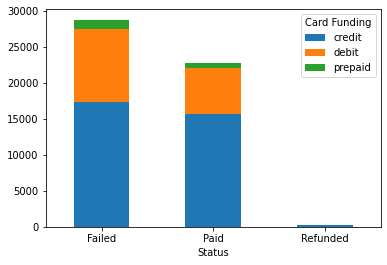

In [174]:
ct.plot(kind="bar", stacked=True, rot=0)

In [175]:
ct1 = pd.crosstab(df3['Status'], df3['Card Brand'])
ct1

Card Brand,American Express,Diners Club,MasterCard,UnionPay,Visa
Status,,,,,
Failed,1005,1,9572,71,18164
Paid,921,0,8161,144,13580
Refunded,14,0,108,0,189


<AxesSubplot:xlabel='Status'>

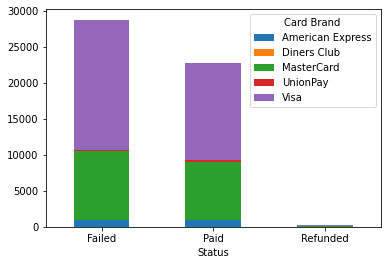

In [176]:
ct1.plot(kind="bar", stacked=True, rot=0)

In [177]:
ct1 = pd.crosstab(df3['Status'], [df3['Card Brand'], df3['Card CVC Status']])
ct1                               

Card Brand      American Express                            MasterCard        \
Card CVC Status             fail pass unavailable unchecked       fail  pass   
Status                                                                         
Failed                         6  797          83       119         16  7920   
Paid                           0  734          68       112          5  6686   
Refunded                       0   13           0         1          0    88   

Card Brand                            UnionPay                  Visa         \
Card CVC Status unavailable unchecked     fail pass unavailable fail   pass   
Status                                                                        
Failed                  814       762        3   46          22   91  15668   
Paid                    577       839        0  144           0    7  11827   
Refunded                  5        11        0    0           0    0    169   

Card Brand                             
Card CVC Status unavailable unchecked  
Status                                 
Failed                 1278       929  
Paid                    592      1041  
Refunded                  9        10

<Figure size 1440x576 with 0 Axes>

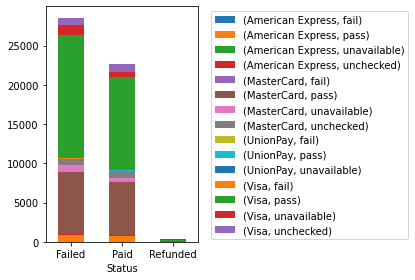

In [178]:
fig = plt.figure(1, [20, 8])
ct1.plot(kind="bar", stacked=True, rot=0)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [179]:
ct3 = pd.crosstab(df3['Status'], [df3['Card Funding'],df3['Card Brand']])
ct3

Card Funding           credit                                         \
Card Brand   American Express Diners Club MasterCard UnionPay   Visa   
Status                                                                 
Failed                   1001           1       5592       58  10721   
Paid                      915           0       5485      125   9153   
Refunded                   14           0         67        0    117   

Card Funding            debit                                    prepaid  \
Card Brand   American Express MasterCard UnionPay  Visa American Express   
Status                                                                     
Failed                      0       3492       13  6635                4   
Paid                        5       2367       19  3957                1   
Refunded                    0         37        0    67                0   

Card Funding                  
Card Brand   MasterCard Visa  
Status                        
Failed              488  808  
Paid                309  470  
Refunded              4    5

<Figure size 1440x576 with 0 Axes>

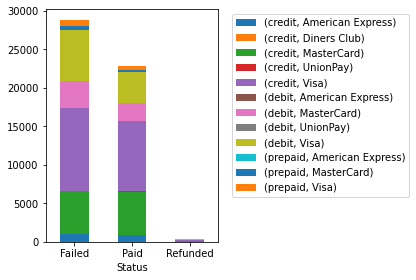

In [180]:
fig = plt.figure(1, [20, 8])
ct3.plot(kind="bar", stacked=True, rot=0)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

```
Most Failed Transactions are from Debit Visa, Debit Mastercard,and Prepaid Visa Card
```

In [181]:
df3.describe(include=[bool,object])

,Seller Message,Currency,Converted Currency,Status,Captured,Card Last4,Card Brand,Card Funding,Payment Source Type,Card Exp Month,Card Exp Year,Card Address Country,Card Issue Country,Card CVC Status,Card AVS Zip Status,Card AVS Line1 Status
count,51419,51930,51930,51930,51930,51930,51930,51930,51930,51930,51930,6430,51929,51492,520,181
unique,27,4,4,3,2,4618,5,3,1,12,13,64,116,4,4,2
top,Payment complete.,usd,usd,Failed,False,8896,Visa,credit,card,8,2024,IN,IN,pass,pass,unavailable
freq,23112,42044,45514,28813,28841,344,31933,33249,51930,5409,11029,3045,26664,44092,241,172


In [182]:
ct4 = pd.crosstab(df3['Status'], [df3['Card Funding'],df3['Card Brand'],df3['Card CVC Status']])
ct4

Card Funding              credit                                              \
Card Brand      American Express                            MasterCard         
Card CVC Status             fail pass unavailable unchecked       fail  pass   
Status                                                                         
Failed                         5  797          80       119          4  4585   
Paid                           0  728          68       112          5  4402   
Refunded                       0   13           0         1          0    50   

Card Funding                                         ...          prepaid  \
Card Brand                            UnionPay       ... American Express   
Card CVC Status unavailable unchecked     fail pass  ...             pass   
Status                                               ...                    
Failed                  398       566        3   46  ...                0   
Paid                    381       647        0  125  ...                1   
Refunded                  4         9        0    0  ...                0   

Card Funding                                                                 \
Card Brand                  MasterCard                            Visa        
Card CVC Status unavailable       fail pass unavailable unchecked fail pass   
Status                                                                        
Failed                    3          2  367         107        12    1  733   
Paid                      0          0  219          77        10    0  395   
Refunded                  0          0    4           0         0    0    4   

Card Funding                           
Card Brand                             
Card CVC Status unavailable unchecked  
Status                                 
Failed                   45        26  
Paid                      4        64  
Refunded                  0         1  

[3 rows x 37 columns]

<Figure size 1440x576 with 0 Axes>

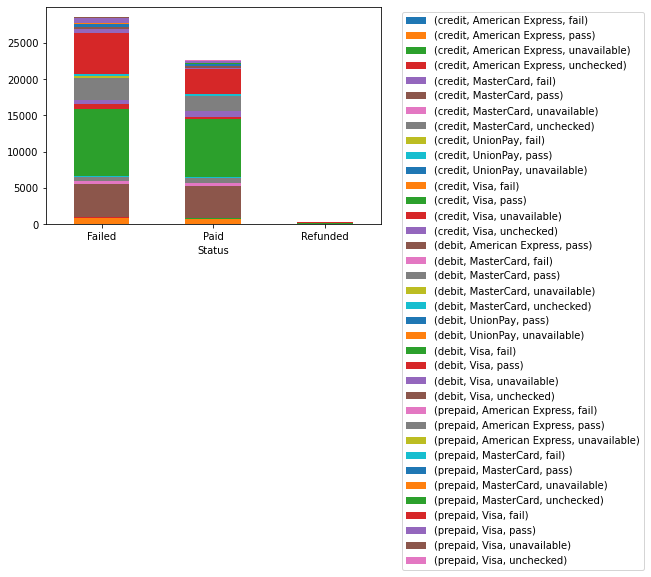

In [183]:
fig = plt.figure(1, [20, 8])
ct4.plot(kind="bar", stacked=True, rot=0)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

In [184]:
ct5 = pd.crosstab(df3['Status'], [df3['Card Funding'],df3['Card CVC Status']])
ct5 

Card Funding    credit                              debit                    \
Card CVC Status   fail   pass unavailable unchecked  fail  pass unavailable   
Status                                                                        
Failed              51  14716        1164      1255    61  8615         878   
Paid                 5  13256         832      1469     7  5520         324   
Refunded             0    169           9        15     0    93           5   

Card Funding              prepaid                              
Card CVC Status unchecked    fail  pass unavailable unchecked  
Status                                                         
Failed                517       4  1100         155        38  
Paid                  449       0   615          81        74  
Refunded                6       0     8           0         1

<Figure size 1440x576 with 0 Axes>

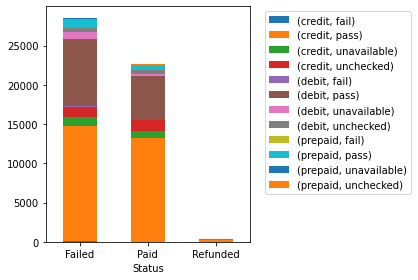

In [185]:
fig = plt.figure(1, [20, 8])
ct5.plot(kind="bar", stacked=True, rot=0)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

```
Transactions failed are higher from Debit card and CVC status pass & from Debit Unavailable & Prepaid Pass
```

In [186]:
df3[df3['Card Address Country'] != df3['Card Issue Country']]['Status'].value_counts()

Failed      24661
Paid        20652
Refunded      299
Name: Status, dtype: int64

In [187]:
df3[df3['Card Address Country'] != df3['Card Issue Country']].shape[0]

45612

## <span style='background :yellow' > Insights and Inferences:` <span/>

### Insights from Data3:
- Data is about the refund made to the customer
- There are **1733** transactions where Transaction date is post the Card expiry date, means payment was done on expired card and hence payment failed.
- Debit card and then Prepaid has the higher chances of failing
- Visa Card has the highest chance of Failing
- Most Failed Transactions are from Debit Visa, Debit Mastercard,and Prepaid Visa Card
- **Higher chances of Failed Trasactions:**
    - Credit Americal Express Unavailable CVC status
    - Credit Visa Unavailable CVC status
    - Preapid Visa Fail CVC status
    - Debit Visa 
    - Debit MasterCard
    - Prepaid Visa
    - Debit Unavailable CVC status
    - Debit Pass CVC status
    - Prepaid Unavailable CVC status
- Card Issue country not matching the card address country can be reason or type error.



### Actionable Insights and Patterns:
- It is very much visible that Transactions done on Debit Visa has the highest Failing chances, to avoid this transactions shall be encouraged in Credit + MasterCard.
- Also the algorithm needs to check the expiry and current while making the transaction.

# END